# **Passenger Load Prediction Project**

### **1 EDA, Data Cleaning & Feature Engineering**

This notebook performs the exploratory data analysis (EDA) and data cleaning for the flight dataset. The objective is to understand the structure and key characteristics of the data, identify outliers and prepare a clean dataset for modeling.
The analysis includes descriptive statistics, visual exploration and systematic filtering to ensure that the resulting dataset provides a reliable foundation for the subsequent predictive modeling.

**Import packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Read the cleaned data**

Read the data. You can select and download similar data here: https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=GEE&QO_fu146_anzr=Nv4%20Pn44vr45

In [2]:
# Read data
data = pd.read_csv('../data/flight_data.csv')

**Get data info and overview**

In [3]:
# Get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440751 entries, 0 to 440750
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DEPARTURES_SCHEDULED  440751 non-null  float64
 1   DEPARTURES_PERFORMED  440751 non-null  float64
 2   PAYLOAD               440751 non-null  float64
 3   SEATS                 440751 non-null  float64
 4   PASSENGERS            440751 non-null  float64
 5   FREIGHT               440751 non-null  float64
 6   MAIL                  440751 non-null  float64
 7   DISTANCE              440751 non-null  float64
 8   RAMP_TO_RAMP          440751 non-null  float64
 9   AIR_TIME              440751 non-null  float64
 10  UNIQUE_CARRIER        440751 non-null  object 
 11  UNIQUE_CARRIER_NAME   440751 non-null  object 
 12  CARRIER_GROUP         440751 non-null  int64  
 13  ORIGIN_AIRPORT_ID     440751 non-null  int64  
 14  ORIGIN                440751 non-null  object 
 15  

In [4]:
# Display first rows of data
data.head()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,ORIGIN_CITY_NAME,ORIGIN_STATE_FIPS,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_FIPS,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,MONTH
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,"Chicago, IL",17,13232,MDW,"Chicago, IL",17,622,1,2024,10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Block Island, RI",44,15855,WST,"Westerly, RI",44,79,1,2024,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Block Island, RI",44,15855,WST,"Westerly, RI",44,79,1,2024,7
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Block Island, RI",44,15855,WST,"Westerly, RI",44,79,1,2024,8
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,"Block Island, RI",44,15855,WST,"Westerly, RI",44,79,1,2024,12


In [5]:
# Display last rows of data
data.tail()

,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,AIR_TIME,...,ORIGIN_CITY_NAME,ORIGIN_STATE_FIPS,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_FIPS,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,MONTH
440746,989.0,987.0,2902800.0,8892.0,5602.0,8038.0,0.0,59.0,38105.0,28285.0,...,"Anchorage, AK",2,11555,ENA,"Kenai, AK",2,416,1,2024,8
440747,995.0,994.0,2737200.0,8946.0,7247.0,10718.0,0.0,59.0,37921.0,27463.0,...,"Anchorage, AK",2,11555,ENA,"Kenai, AK",2,416,1,2024,7
440748,999.0,998.0,2748200.0,8991.0,6631.0,5663.0,0.0,59.0,39218.0,30137.0,...,"Kenai, AK",2,10299,ANC,"Anchorage, AK",2,416,1,2024,7
440749,1522.0,1522.0,1826400.0,8026.0,5084.0,10340.0,0.0,11.0,17768.0,13202.0,...,"Tinian, TT",75,14955,SPN,"Saipan, TT",75,79,1,2024,7
440750,1574.0,1574.0,1888800.0,8284.0,5104.0,29100.0,0.0,11.0,20390.0,15668.0,...,"Saipan, TT",75,15215,TIQ,"Tinian, TT",75,79,1,2024,7


In [6]:
# Check for missing values
data.isna().sum()

DEPARTURES_SCHEDULED    0
DEPARTURES_PERFORMED    0
PAYLOAD                 0
SEATS                   0
PASSENGERS              0
FREIGHT                 0
MAIL                    0
DISTANCE                0
RAMP_TO_RAMP            0
AIR_TIME                0
UNIQUE_CARRIER          0
UNIQUE_CARRIER_NAME     0
CARRIER_GROUP           0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
ORIGIN_STATE_FIPS       0
DEST_AIRPORT_ID         0
DEST                    0
DEST_CITY_NAME          0
DEST_STATE_FIPS         0
AIRCRAFT_TYPE           0
AIRCRAFT_CONFIG         0
YEAR                    0
MONTH                   0
dtype: int64

**Change column names to lowercase letters**

In [7]:
# Change column names to lowercase letters
data.columns = [x.lower() for x in data.columns.to_list()]
data.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'unique_carrier_name', 'carrier_group',
       'origin_airport_id', 'origin', 'origin_city_name', 'origin_state_fips',
       'dest_airport_id', 'dest', 'dest_city_name', 'dest_state_fips',
       'aircraft_type', 'aircraft_config', 'year', 'month'],
      dtype='object')

**Add average passengers per flight** 

Add column with average passengers per flight, using departures_performed as departures_scheduled does not appear to contain reliable entries but rather many null values.

In [8]:
# Add column with average passengers per flight
data["avg_passengers_per_flight"] = (
    (data["passengers"] / data["departures_performed"].replace(0, np.nan))
    .round(0)
    .astype("Int64")
)

**Add average seats per flight**

Add column with average seats per flight, using departures_performed as departures_scheduled does not appear to contain reliable entries but rather many null values.

In [9]:
data["avg_seats_per_flight"] = (
    (data["seats"] / data["departures_performed"].replace(0, np.nan))
    .round(0)
    .astype("Int64")
)

In [10]:
# Display last rows of data to check new columns
data.tail()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_airport_id,dest,dest_city_name,dest_state_fips,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
440746,989.0,987.0,2902800.0,8892.0,5602.0,8038.0,0.0,59.0,38105.0,28285.0,...,11555,ENA,"Kenai, AK",2,416,1,2024,8,6,9
440747,995.0,994.0,2737200.0,8946.0,7247.0,10718.0,0.0,59.0,37921.0,27463.0,...,11555,ENA,"Kenai, AK",2,416,1,2024,7,7,9
440748,999.0,998.0,2748200.0,8991.0,6631.0,5663.0,0.0,59.0,39218.0,30137.0,...,10299,ANC,"Anchorage, AK",2,416,1,2024,7,7,9
440749,1522.0,1522.0,1826400.0,8026.0,5084.0,10340.0,0.0,11.0,17768.0,13202.0,...,14955,SPN,"Saipan, TT",75,79,1,2024,7,3,5
440750,1574.0,1574.0,1888800.0,8284.0,5104.0,29100.0,0.0,11.0,20390.0,15668.0,...,15215,TIQ,"Tinian, TT",75,79,1,2024,7,3,5


**Descriptive Statistics**

In [11]:
data.describe()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,origin_airport_id,origin_state_fips,dest_airport_id,dest_state_fips,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
count,440751.000000,440751.000000,4.407510e+05,440751.000000,440751.000000,4.407510e+05,4.407510e+05,440751.000000,440751.000000,440751.000000,...,440751.000000,440751.000000,440751.000000,440751.000000,440751.000000,440751.000000,440751.0,440751.000000,439891.0,439891.0
mean,19.479345,20.087244,7.366505e+05,2407.468793,1949.990149,6.354306e+04,2.638118e+03,768.300040,2631.662465,2136.808293,...,12764.039240,25.041030,12761.797929,25.102747,634.727724,1.142303,2024.0,6.575504,86.327208,114.726655
std,33.681686,33.100850,1.375799e+06,4547.112330,3812.564110,4.714950e+05,3.434086e+04,638.189156,4548.022006,3854.597995,...,1582.923385,17.786614,1579.855683,17.776401,170.938409,0.437672,0.0,3.432239,64.721131,75.667556
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,10001.000000,1.000000,10001.000000,1.000000,26.000000,1.000000,2024.0,1.000000,0.0,0.0
25%,1.000000,1.000000,4.480000e+04,81.000000,32.000000,0.000000e+00,0.000000e+00,288.000000,174.000000,139.000000,...,11292.000000,8.000000,11292.000000,8.000000,614.000000,1.000000,2024.0,4.000000,6.0,50.0
50%,7.000000,8.000000,2.380000e+05,572.000000,442.000000,0.000000e+00,0.000000e+00,630.000000,892.000000,699.000000,...,12889.000000,23.000000,12889.000000,23.000000,673.000000,1.000000,2024.0,7.000000,97.0,143.0
75%,26.000000,27.000000,9.114000e+05,3040.000000,2403.500000,1.120000e+03,0.000000e+00,1047.000000,3305.000000,2582.000000,...,14100.000000,41.000000,14100.000000,41.000000,699.000000,1.000000,2024.0,10.000000,142.0,176.0
max,1574.000000,1574.000000,4.953270e+07,83712.000000,72783.000000,4.129528e+07,3.108694e+06,7360.000000,103896.000000,94868.000000,...,17058.000000,78.000000,17058.000000,78.000000,889.000000,4.000000,2024.0,12.000000,489.0,509.0


**Unique values per feature**

In [12]:
data.nunique()

departures_scheduled            511
departures_performed            510
payload                      104338
seats                         13722
passengers                    19395
freight                       54338
mail                          14855
distance                       2589
ramp_to_ramp                  22149
air_time                      19542
unique_carrier                  200
unique_carrier_name             200
carrier_group                     4
origin_airport_id              1338
origin                         1338
origin_city_name               1199
origin_state_fips                53
dest_airport_id                1340
dest                           1340
dest_city_name                 1207
dest_state_fips                  53
aircraft_type                   157
aircraft_config                   4
year                              1
month                            12
avg_passengers_per_flight       372
avg_seats_per_flight            309
dtype: int64

**Check flight with highest number of average seats**

In [13]:
data.loc[data["avg_seats_per_flight"].idxmax()]

departures_scheduled                               0.0
departures_performed                               1.0
payload                                       138114.0
seats                                            509.0
passengers                                       239.0
freight                                        17153.0
mail                                               0.0
distance                                         187.0
ramp_to_ramp                                       0.0
air_time                                           0.0
unique_carrier                                      LH
unique_carrier_name          Lufthansa German Airlines
carrier_group                                        0
origin_airport_id                                12478
origin                                             JFK
origin_city_name                          New York, NY
origin_state_fips                                   36
dest_airport_id                                  10721
dest      

**Check flight with highest number of average passengers**

In [14]:
data.loc[data["avg_passengers_per_flight"].idxmax()]

departures_scheduled                               0.0
departures_performed                               1.0
payload                                       138114.0
seats                                            509.0
passengers                                       489.0
freight                                            0.0
mail                                               0.0
distance                                         413.0
ramp_to_ramp                                       0.0
air_time                                           0.0
unique_carrier                                      LH
unique_carrier_name          Lufthansa German Airlines
carrier_group                                        0
origin_airport_id                                12264
origin                                             IAD
origin_city_name                        Washington, DC
origin_state_fips                                   51
dest_airport_id                                  10721
dest      

**Check top 10 flights with highest number of average seats**

In [15]:
data.nlargest(10, "avg_seats_per_flight")


,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_airport_id,dest,dest_city_name,dest_state_fips,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
58833,0.0,1.0,138114.0,509.0,239.0,17153.0,0.0,187.0,0.0,0.0,...,10721,BOS,"Boston, MA",25,882,1,2024,10,239,509
58834,0.0,1.0,138114.0,509.0,261.0,14938.0,0.0,413.0,0.0,0.0,...,12264,IAD,"Washington, DC",51,882,1,2024,8,261,509
58835,0.0,1.0,138114.0,509.0,473.0,4.0,0.0,228.0,0.0,0.0,...,12264,IAD,"Washington, DC",51,882,1,2024,8,473,509
58836,0.0,1.0,138114.0,509.0,481.0,6250.0,0.0,2611.0,0.0,0.0,...,10721,BOS,"Boston, MA",25,882,1,2024,6,481,509
58837,0.0,1.0,138114.0,509.0,489.0,0.0,0.0,413.0,0.0,0.0,...,10721,BOS,"Boston, MA",25,882,1,2024,7,489,509
58076,0.0,1.0,120182.0,485.0,481.0,23192.0,0.0,2556.0,0.0,0.0,...,12892,LAX,"Los Angeles, CA",6,882,1,2024,11,481,485
58881,0.0,1.0,157333.0,453.0,0.0,0.0,0.0,0.0,30.0,29.0,...,10821,BWI,"Baltimore, MD",24,819,1,2024,7,0,453
58882,0.0,1.0,157333.0,453.0,0.0,7053.0,0.0,430.0,88.0,54.0,...,10821,BWI,"Baltimore, MD",24,819,1,2024,9,0,453
58883,0.0,1.0,157333.0,453.0,0.0,7293.0,0.0,430.0,99.0,71.0,...,11193,CVG,"Cincinnati, OH",21,819,1,2024,8,0,453
58884,0.0,1.0,157333.0,453.0,0.0,7524.0,0.0,3370.0,484.0,375.0,...,10821,BWI,"Baltimore, MD",24,819,1,2024,8,0,453


**Check top 10 flights with highest number of average passengers**

In [16]:
data.nlargest(10, "avg_passengers_per_flight")

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_airport_id,dest,dest_city_name,dest_state_fips,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
58837,0.0,1.0,138114.0,509.0,489.0,0.0,0.0,413.0,0.0,0.0,...,10721,BOS,"Boston, MA",25,882,1,2024,7,489,509
58076,0.0,1.0,120182.0,485.0,481.0,23192.0,0.0,2556.0,0.0,0.0,...,12892,LAX,"Los Angeles, CA",6,882,1,2024,11,481,485
58836,0.0,1.0,138114.0,509.0,481.0,6250.0,0.0,2611.0,0.0,0.0,...,10721,BOS,"Boston, MA",25,882,1,2024,6,481,509
58835,0.0,1.0,138114.0,509.0,473.0,4.0,0.0,228.0,0.0,0.0,...,12264,IAD,"Washington, DC",51,882,1,2024,8,473,509
58072,0.0,1.0,119353.0,381.0,377.0,0.0,0.0,1236.0,162.0,138.0,...,15370,TUL,"Tulsa, OK",40,627,1,2024,1,377,381
60336,0.0,1.0,480900.0,453.0,375.0,8865.0,0.0,1017.0,142.0,121.0,...,11618,EWR,"Newark, NJ",34,819,1,2024,3,375,453
58071,0.0,1.0,119353.0,381.0,369.0,0.0,0.0,1829.0,222.0,192.0,...,15624,VPS,"Valparaiso, FL",12,627,1,2024,1,369,381
58552,0.0,1.0,126600.0,390.0,369.0,0.0,0.0,1995.0,309.0,270.0,...,12892,LAX,"Los Angeles, CA",6,627,1,2024,12,369,390
60335,0.0,1.0,480900.0,453.0,368.0,0.0,0.0,1017.0,167.0,136.0,...,11423,DSM,"Des Moines, IA",19,819,1,2024,3,368,453
58070,0.0,1.0,119353.0,381.0,367.0,0.0,0.0,1876.0,234.0,210.0,...,12266,IAH,"Houston, TX",48,627,1,2024,1,367,381


**Check count of average passengers per flight with particular focus on 0 values**

In [17]:
data["avg_passengers_per_flight"].value_counts()[:10]

avg_passengers_per_flight
0      74957
2      10063
1       8330
4       6160
3       5734
5       3428
148     3352
146     3342
150     3316
142     3244
Name: count, dtype: Int64

**Check count of freight volume per flight with particular focus on 0** 

In [18]:
data["freight"].value_counts().iloc[:10]

freight
0.0     252487
1.0       1666
2.0       1243
3.0       1104
5.0        877
4.0        837
6.0        701
10.0       550
7.0        516
12.0       486
Name: count, dtype: int64

**Check entries with air_time = 0**

In [19]:
# Count rows with air_time = 0
count_airtime_0 = (data["air_time"] == 0).sum()
print("Rows with air_time = 0:", count_airtime_0)

Rows with air_time = 0: 5723


In [20]:
# Display first rows of data with air_time = 0
data[data["air_time"] == 0].head(15)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_airport_id,dest,dest_city_name,dest_state_fips,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,13232,MDW,"Chicago, IL",17,622,1,2024,10,<NA>,<NA>
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,15855,WST,"Westerly, RI",44,79,1,2024,1,<NA>,<NA>
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,15855,WST,"Westerly, RI",44,79,1,2024,7,<NA>,<NA>
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,15855,WST,"Westerly, RI",44,79,1,2024,8,<NA>,<NA>
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,15855,WST,"Westerly, RI",44,79,1,2024,12,<NA>,<NA>
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,10613,BID,"Block Island, RI",44,79,1,2024,1,<NA>,<NA>
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,10613,BID,"Block Island, RI",44,79,1,2024,7,<NA>,<NA>
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,10613,BID,"Block Island, RI",44,79,1,2024,8,<NA>,<NA>
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,10613,BID,"Block Island, RI",44,79,1,2024,12,<NA>,<NA>
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,...,12478,JFK,"New York, NY",36,622,1,2024,10,<NA>,<NA>


In [21]:
# Check distance for rows with air_time = 0
data.loc[data["air_time"] == 0, ["distance"]].describe()

,distance
count,5723.000000
mean,860.817753
std,1136.956567
min,0.000000
25%,0.000000
50%,304.000000
75%,1235.000000
max,4983.000000


**Identify entries with ramp_to_ramp = 0** 

In [22]:
# Count rows with ramp_to_ramp = 0
count_ramp_to_ramp_0 = (data["ramp_to_ramp"] == 0).sum()
print("Rows with ramp_to_ramp = 0:", count_ramp_to_ramp_0)

Rows with ramp_to_ramp = 0: 3604


In [23]:
# Check distance for rows with ramp_to_ramp = 0
data.loc[data["ramp_to_ramp"] == 0, ["distance"]].describe()

,distance
count,3604.000000
mean,1365.132075
std,1167.914020
min,0.000000
25%,366.000000
50%,954.000000
75%,2345.000000
max,4983.000000


**Remove flights with air or ramp-to-ramp time = 0**

Even if the other columns of these entries are filled, they would distort the modeling

In [24]:
data = data[(data["air_time"] > 0) & (data["ramp_to_ramp"] > 0)]

**Create bins for average passengers per flight and visualize distribution**

Grouping into passenger count intervals to visualize how average passenger numbers are distributed across flights.

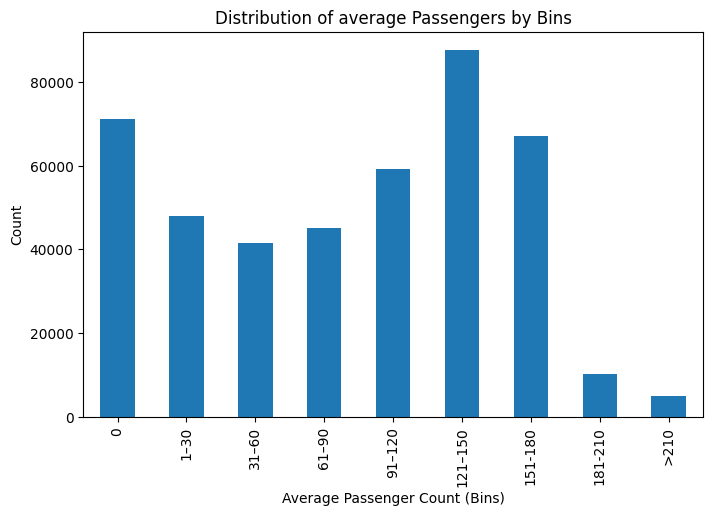

In [25]:
# Define bins and labels
bins = [-1, 0, 30, 60, 90, 120, 150, 180, 210, data["avg_passengers_per_flight"].max()]
labels = ["0", "1–30", "31–60", "61–90", "91–120", "121–150", "151-180", "181-210", ">210"]

# Assign average passengers to bins
data["avg_passengers_binned"] = pd.cut(data["avg_passengers_per_flight"], bins=bins, labels=labels)

# Count passengers in each bin
counts = data["avg_passengers_binned"].value_counts().sort_index()

# Visualize the distribution
counts.plot(kind="bar", figsize=(8,5))
plt.xlabel("Average Passenger Count (Bins)")
plt.ylabel("Count")
plt.title("Distribution of average Passengers by Bins")
plt.show()

**Create column 'route' as origin-destination pair**

In [26]:
# Combine origin and destination into a new column 'route'
data["route"] = data["origin"] + "-" + data["dest"]

In [27]:
# Check first rows of data with new column
data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_city_name,dest_state_fips,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route
164,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,38.0,...,"Fairbanks, AK",2,416,2,2024,7,0,0,0,FAI-FAI
165,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,216.0,174.0,...,"Dallas/Fort Worth, TX",48,626,1,2024,3,0,0,0,AFW-AFW
205,0.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0,40.0,35.0,...,"Barrow, AK",2,416,2,2024,7,0,0,0,AIN-BRW
214,0.0,1.0,0.0,0.0,0.0,0.0,0.0,143.0,85.0,83.0,...,"Fort Yukon, AK",2,34,2,2024,7,0,0,0,FAI-FYU
221,0.0,1.0,0.0,0.0,0.0,0.0,0.0,180.0,65.0,63.0,...,"Barrow, AK",2,416,2,2024,7,0,0,0,PIZ-BRW


**Check count of routes**

In [28]:
# Count entries for each route
data["route"].value_counts()[:10]

route
LAS-LAX    388
LAX-LAS    385
SFO-LAX    341
LAX-SFO    323
IAH-DFW    306
DEN-SLC    300
MSP-ORD    294
DFW-IAH    293
SLC-DEN    290
SEA-LAX    280
Name: count, dtype: int64

**Check entries where origin = destination**

In [29]:
# Check if there are any routes where origin and destination are the same
same_airport_count = (data["origin"] == data["dest"]).sum()
percent_same = 100 * same_airport_count / len(data)
print(f"{same_airport_count} rows ({percent_same:.2f} %) have origin = destination")

2041 rows (0.47 %) have origin = destination


**Remove entries where origin = destination since such flights are not supposed to be part of the model**

In [30]:
# Drop rows and check how many rows are removed
before = len(data)
data = data[data["origin"] != data["dest"]].copy()
after = len(data)

print(f"Removed rows: {before - after}")
print(f"Remaining rows: {after}")


Removed rows: 2041
Remaining rows: 432987


**Create column route_type: domestic, international/unknown**

Route types are derived by comparing origin and destination FIPS codes. Routes where both codes fall within U.S. state ranges (1–56) are classified as Domestic, all others as International/Unknown.

In [31]:
# Load FIPS mapping file
fips_mapping = pd.read_csv("../data/fips_codes_mapping.csv")

In [32]:
# Check data types and strip whitespace
fips_mapping["Code"] = fips_mapping["Code"].astype(str).str.strip()
fips_mapping["Description"] = fips_mapping["Description"].astype(str).str.strip()

# Ensure origin/destination FIPS are strings
data["origin_state_fips"] = data["origin_state_fips"].astype(str).str.strip()
data["dest_state_fips"] = data["dest_state_fips"].astype(str).str.strip()

# Function to classify route type: Codes 1–56 = U.S. States
def classify_route_type(origin_fips, destination_fips):
    domestic_fips = set(str(x) for x in range(1, 57))  
    if origin_fips in domestic_fips and destination_fips in domestic_fips:
        return "Domestic"
    else:
        return "International/Unknown"

# Add new column route_type
data["route_type"] = data.apply(
    lambda row: classify_route_type(row["origin_state_fips"], row["dest_state_fips"]),
    axis=1
)

# Check distribution of route types
print(data["route_type"].value_counts())

route_type
Domestic                 426499
International/Unknown      6488
Name: count, dtype: int64


In [33]:
# Check first rows of data
data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_state_fips,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,route_type
205,0.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0,40.0,35.0,...,2,416,2,2024,7,0,0,0,AIN-BRW,Domestic
214,0.0,1.0,0.0,0.0,0.0,0.0,0.0,143.0,85.0,83.0,...,2,34,2,2024,7,0,0,0,FAI-FYU,Domestic
221,0.0,1.0,0.0,0.0,0.0,0.0,0.0,180.0,65.0,63.0,...,2,416,2,2024,7,0,0,0,PIZ-BRW,Domestic
239,0.0,1.0,0.0,0.0,0.0,0.0,0.0,237.0,115.0,113.0,...,2,34,2,2024,7,0,0,0,ARC-FAI,Domestic
253,0.0,1.0,0.0,0.0,0.0,0.0,0.0,336.0,110.0,108.0,...,2,416,2,2024,7,0,0,0,UMT-FAI,Domestic


**Count entries with departures_performed = 0**

In [34]:
# Count entries with departures_performed = 0
count_departures_0 = (data["departures_performed"] == 0).sum()
print("Rows with departures_performed = 0:", count_departures_0)

Rows with departures_performed = 0: 3


**Count entries with passengers = 0**

In [35]:
# Count entries with passengers = 0
count_passengers_0 = (data["passengers"] == 0).sum()
print("Rows with passengers = 0:", count_passengers_0)


Rows with passengers = 0: 67868


**Remove entries where departures_performed = 0 as these most likely did not take place**

In [36]:
# Drop rows and check how many rows are removed
before = len(data)
data = data[data["departures_performed"] != 0].copy()
after = len(data)

print(f"Removed rows: {before - after}")
print(f"Remaining rows: {after}")


Removed rows: 3
Remaining rows: 432984


**Remove entries where passengers = 0 as these most likely did not take place**

In [37]:
# Drop rows and check how many rows are removed
before = len(data)
data = data[data["passengers"] != 0].copy()
after = len(data)

print(f"Removed rows: {before - after}")
print(f"Remaining rows: {after}")

Removed rows: 67865
Remaining rows: 365119


**Count number of entries per aircraft type (ID)**

In [38]:
# For mapping to aircraft type name see file 'aircraft_type_mapping.csv'
# e.g. 614 = B737-800, 694 = A320-100/200, 673 = ERJ-175...
data["aircraft_type"].value_counts()[:10]

aircraft_type
614    46607
694    36797
838    29286
673    27760
612    24329
698    21108
699    18859
888    15014
721    14611
722    12410
Name: count, dtype: int64

**Mapping aircraft_types IDs to aircraft type names using the aircraft_type_mapping file**

In [39]:
# Read aircraft type mapping file
mapping = pd.read_csv("../data/aircraft_type_mapping.csv")

# Strip whitespace from aircraft type columns
data["aircraft_type"] = data["aircraft_type"].astype(str).str.strip()
mapping["Code"] = mapping["Code"].astype(str).str.strip()

In [40]:
# Merging the mapped data by adding a column 'aircraft_name' to the dataframe
data = data.merge(
    mapping,
    left_on="aircraft_type",
    right_on="Code",
    how="left"
)
data["aircraft_name"] = data["Description"]

# Delete unnecessary columns
data = data.drop(columns=["Code", "Description"])

In [41]:
# Check first rows of data with new column
data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,aircraft_type,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,route_type,aircraft_name
0,0.0,1.0,500.0,2.0,1.0,0.0,0.0,7.0,18.0,10.0,...,36,1,2024,6,1,2,1–30,TYE-BVU,Domestic,Cessna 172 Skyhawk
1,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,36,1,2024,7,1,2,1–30,MRI-BVU,Domestic,Cessna 172 Skyhawk
2,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,36,1,2024,4,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk
3,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,29.0,21.0,...,36,1,2024,10,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk
4,0.0,1.0,500.0,2.0,1.0,0.0,0.0,44.0,33.0,25.0,...,36,2,2024,6,1,2,1–30,MRI-TYE,Domestic,Cessna 172 Skyhawk


**Sum departures_performed for each aircraft_name and get the top 15**

In [42]:
# Grouping departures by aircraft name and get the top 15
aircraft_departures = (
    data.groupby("aircraft_name")["departures_performed"].sum()
    .sort_values(ascending=False)
    .iloc[:15]
)


**Visualize top 15 aircraft types by departures performed**

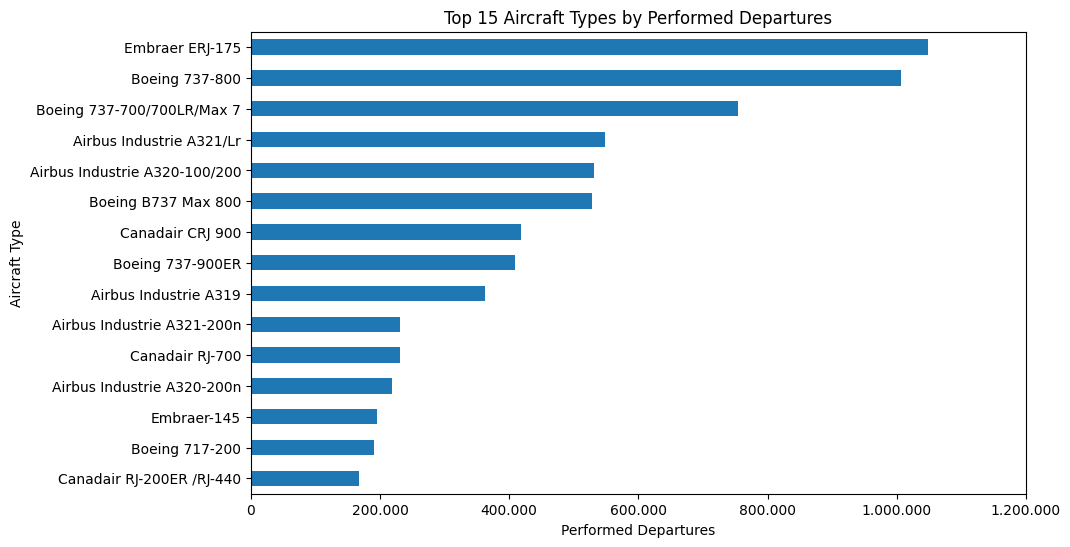

In [43]:
# Create horizontal bar plot for top 15 aircraft types by departures performed
ax = aircraft_departures.plot(kind="barh", figsize=(10,6))
ax.ticklabel_format(style="plain", axis="x")
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x):,}".replace(",", ".") for x in xticks])
plt.xlabel("Performed Departures")
plt.ylabel("Aircraft Type")
plt.title("Top 15 Aircraft Types by Performed Departures")
plt.gca().invert_yaxis()
plt.show()



**Analyze and visualize top 15 aircraft types by passenger numbers**

In [44]:
# Grouping passengers by aircraft name and get the top 15
aircraft_passengers = (
    data.groupby("aircraft_name")["passengers"].sum()
    .sort_values(ascending=False)
    .iloc[:15]
)

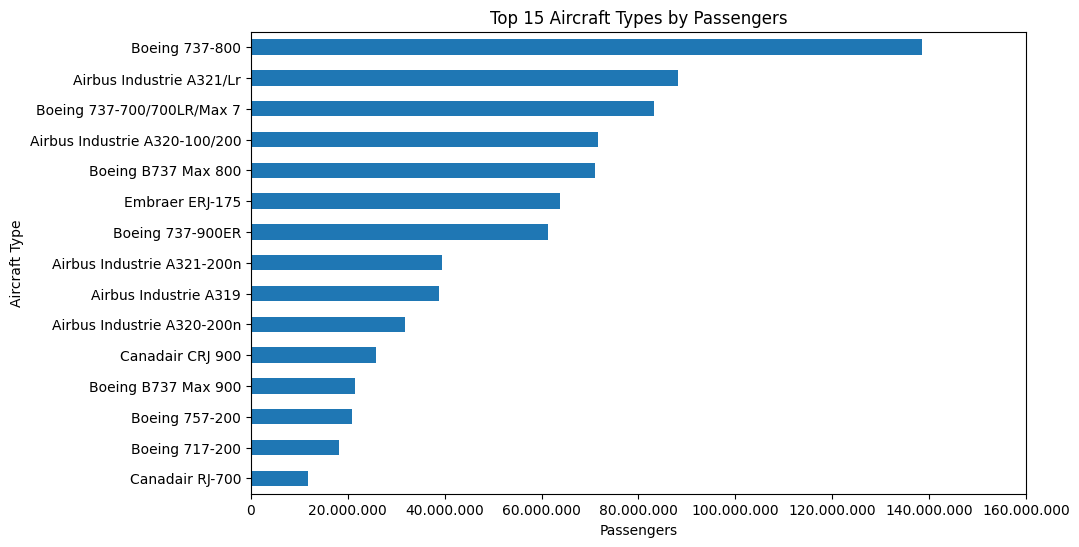

In [45]:
# Create horizontal bar plot for top 15 aircraft types by passengers
ax = aircraft_passengers.plot(kind="barh", figsize=(10,6))
ax.ticklabel_format(style="plain", axis="x")
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x):,}".replace(",", ".") for x in xticks])

plt.xlabel("Passengers")
plt.ylabel("Aircraft Type")
plt.title("Top 15 Aircraft Types by Passengers")
plt.gca().invert_yaxis()
plt.show()

**Analyze and visualize top 15 routes by passenger numbers**

In [46]:
# Grouping passengers by route and get the top 15
route_passengers = (
    data.groupby("route")["passengers"].sum()
    .sort_values(ascending=False)
    .iloc[:15]   
)

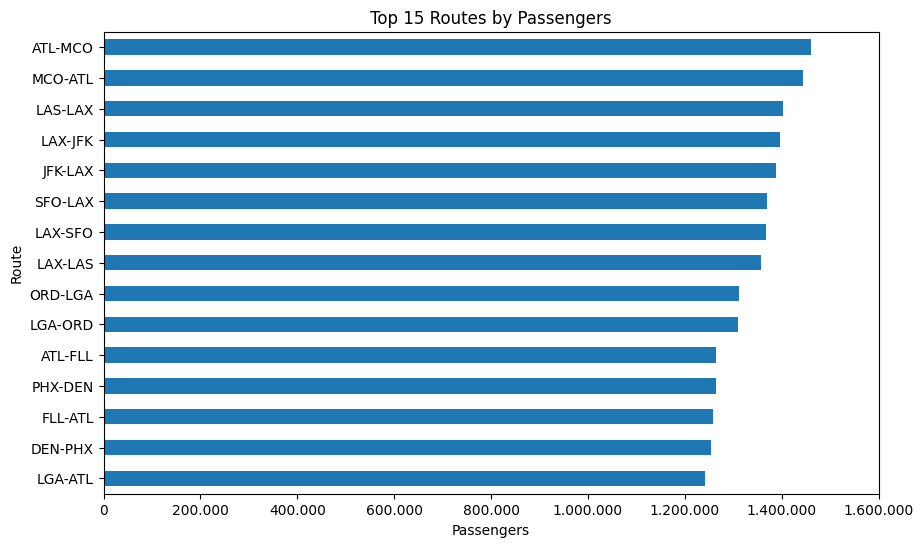

In [47]:
# Create horizontal bar plot for top 15 routes by passengers
ax = route_passengers.plot(kind="barh", figsize=(10,6))
ax.ticklabel_format(style="plain", axis="x")
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x):,}".replace(",", ".") for x in xticks])
plt.xlabel("Passengers")
plt.ylabel("Route")
plt.title("Top 15 Routes by Passengers")
plt.gca().invert_yaxis()
plt.show()

**Analyze and visualize top 15 aircraft types by average passenger numbers per flight**

In [48]:
# Grouping average passengers per flight by route and get the top 15
route_avg_pax = (
    data.groupby("route")["avg_passengers_per_flight"]
    .mean()
    .sort_values(ascending=False)
    .iloc[:15]
)

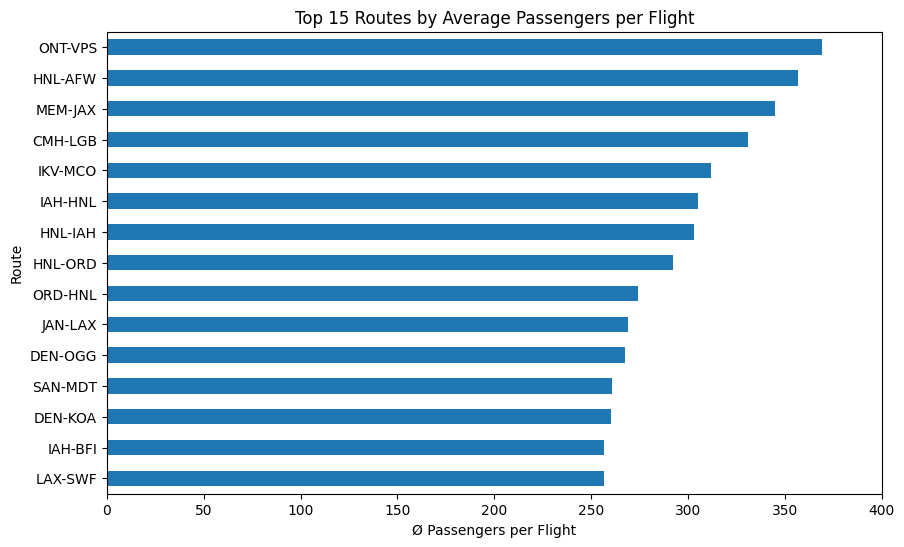

In [49]:
# Create horizontal bar plot for top 15 routes by average passengers per flight
ax = route_avg_pax.plot(kind="barh", figsize=(10,6))
ax.ticklabel_format(style="plain", axis="x") 
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{x:,.0f}".replace(",", ".") for x in xticks])
plt.xlabel("Ø Passengers per Flight")
plt.ylabel("Route")
plt.title("Top 15 Routes by Average Passengers per Flight")
plt.gca().invert_yaxis()
plt.show()

**Analyze and visualize the distribution of average passengers per flight per route (top 15 routes by number of flights)**

<Figure size 1200x600 with 0 Axes>

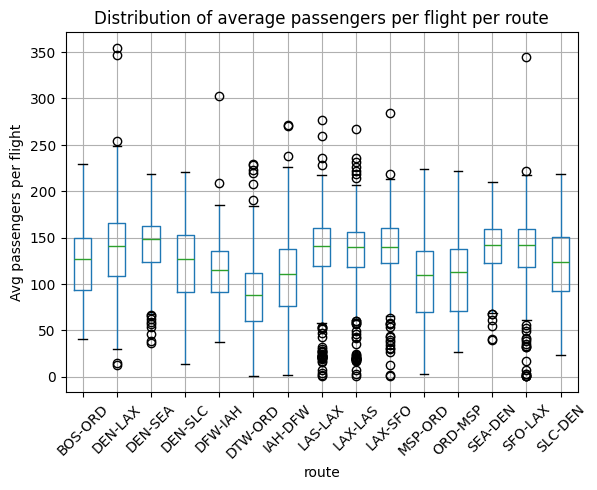

In [50]:
# Route count
top15_routes = data["route"].value_counts().head(15).index
subset = data[data["route"].isin(top15_routes)]

# Plot
plt.figure(figsize=(12,6))
subset.boxplot(column="avg_passengers_per_flight", by="route", rot=45)
plt.ylabel("Avg passengers per flight")
plt.title("Distribution of average passengers per flight per route")
plt.suptitle("")
plt.show()

**Analyze and visualize the distribution of average passengers per flight per route (top 15 routes ranked by average passenger count per flight)**

<Figure size 1200x600 with 0 Axes>

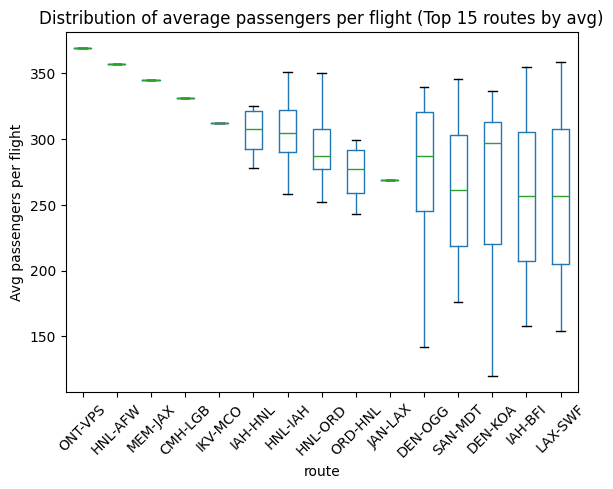

In [51]:
# Avg. passenger count
route_avg = (
    data.groupby("route")["avg_passengers_per_flight"]
    .mean()
    .sort_values(ascending=False)
)
top15_routes = route_avg.head(15).index
subset = data[data["route"].isin(top15_routes)].copy()
subset["route"] = pd.Categorical(subset["route"], categories=list(top15_routes), ordered=True)

# Plot
plt.figure(figsize=(12,6))
subset.boxplot(column="avg_passengers_per_flight", by="route", rot=45, grid=False)
plt.ylabel("Avg passengers per flight")
plt.title("Distribution of average passengers per flight (Top 15 routes by avg)")
plt.suptitle("")
plt.show()



**Add passenger load factor to data**

Average passengers per flight is biased by aircraft size and seating configuration. The passenger load factor is a better indicator as it normalizes demand relative to capacity.

In [52]:
# Add pax_load_factor to data by calculating passengers / seats
data["pax_load_factor"] = (
    (data["passengers"] / data["seats"].replace(0, np.nan))
    .round(2)
)

In [53]:
# Display last rows of data to check new column
data.tail(10)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,aircraft_config,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,route_type,aircraft_name,pax_load_factor
365109,777.0,777.0,932400.0,4135.0,2545.0,11093.0,0.0,11.0,10302.0,7971.0,...,1,2024,6,3,5,1–30,SPN-TIQ,International/Unknown,Piper PA-32 (Cherokee 6),0.62
365110,801.0,801.0,961200.0,4254.0,2599.0,16924.0,0.0,11.0,10938.0,8535.0,...,1,2024,5,3,5,1–30,SPN-TIQ,International/Unknown,Piper PA-32 (Cherokee 6),0.61
365111,889.0,886.0,2360400.0,7992.0,5182.0,10195.0,0.0,59.0,33406.0,24906.0,...,1,2024,6,6,9,1–30,ANC-ENA,Domestic,Cessna 208 Caravan,0.65
365112,891.0,889.0,2367000.0,8002.0,4689.0,5250.0,0.0,59.0,33895.0,26497.0,...,1,2024,6,5,9,1–30,ENA-ANC,Domestic,Cessna 208 Caravan,0.59
365113,987.0,986.0,2900400.0,8874.0,7626.0,6509.0,0.0,59.0,38376.0,29634.0,...,1,2024,8,8,9,1–30,ENA-ANC,Domestic,Cessna 208 Caravan,0.86
365114,989.0,987.0,2902800.0,8892.0,5602.0,8038.0,0.0,59.0,38105.0,28285.0,...,1,2024,8,6,9,1–30,ANC-ENA,Domestic,Cessna 208 Caravan,0.63
365115,995.0,994.0,2737200.0,8946.0,7247.0,10718.0,0.0,59.0,37921.0,27463.0,...,1,2024,7,7,9,1–30,ANC-ENA,Domestic,Cessna 208 Caravan,0.81
365116,999.0,998.0,2748200.0,8991.0,6631.0,5663.0,0.0,59.0,39218.0,30137.0,...,1,2024,7,7,9,1–30,ENA-ANC,Domestic,Cessna 208 Caravan,0.74
365117,1522.0,1522.0,1826400.0,8026.0,5084.0,10340.0,0.0,11.0,17768.0,13202.0,...,1,2024,7,3,5,1–30,TIQ-SPN,International/Unknown,Piper PA-32 (Cherokee 6),0.63
365118,1574.0,1574.0,1888800.0,8284.0,5104.0,29100.0,0.0,11.0,20390.0,15668.0,...,1,2024,7,3,5,1–30,SPN-TIQ,International/Unknown,Piper PA-32 (Cherokee 6),0.62


**Analyze and visualize the top 15 routes ranked by average passenger load factor**

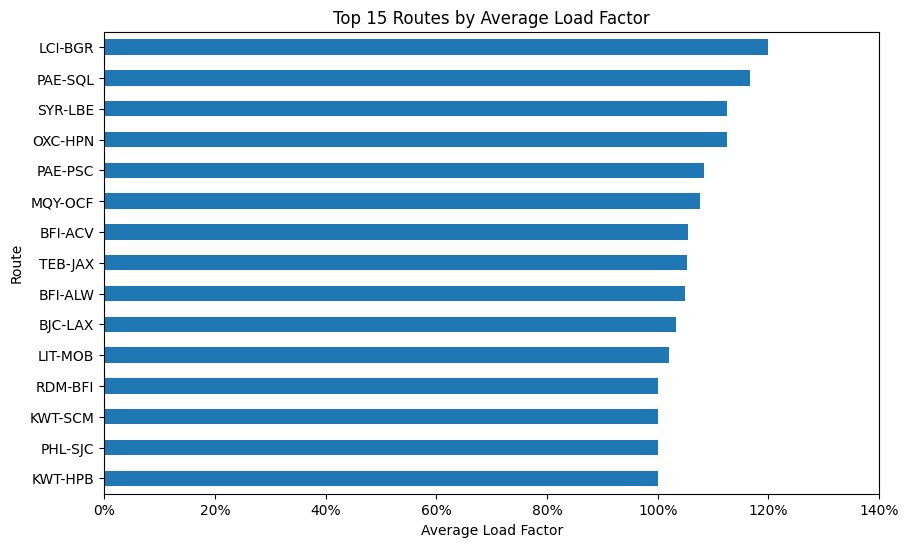

In [54]:
# Check route load factor by grouping by route
route_load_factor = (
    data.groupby("route")[["passengers", "seats"]]
    .sum()
    .assign(pax_load_factor=lambda d: d["passengers"] / d["seats"])
    .sort_values("pax_load_factor", ascending=False)
    .head(15)
)

# Plot bar chart for top 15 routes by average load factor
ax = route_load_factor["pax_load_factor"].plot(kind="barh", figsize=(10,6))
plt.ylabel("Route")
plt.xlabel("Average Load Factor")
plt.title("Top 15 Routes by Average Load Factor")
plt.gca().invert_yaxis()
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xticklabels([f"{x:.0%}" for x in xticks])

plt.show()

**Analyze and visualize the distribution of passenger load factor for the top 15 routes (ranked by weighted average load factor)**

<Figure size 1200x600 with 0 Axes>

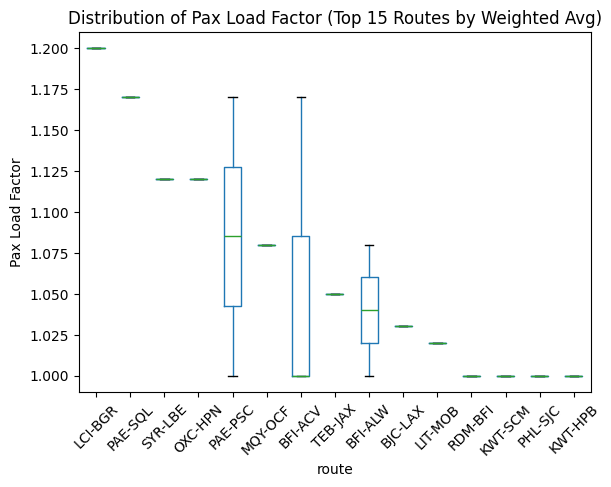

In [55]:
# Check pax load factor for top 15 routes by weighted average load factor
top15_routes_load_factor = route_load_factor.head(15).index
subset = data[data["route"].isin(top15_routes_load_factor)].copy()
subset["route"] = pd.Categorical(subset["route"], categories=list(top15_routes_load_factor), ordered=True)

# Plot box plot for pax load factor distribution for top 15 routes
plt.figure(figsize=(12,6))
subset.boxplot(column="pax_load_factor", by="route", rot=45, grid=False)
plt.ylabel("Pax Load Factor")
plt.title("Distribution of Pax Load Factor (Top 15 Routes by Weighted Avg)")
plt.suptitle("")
plt.show()



**Check load factors > 1**

In [56]:
# Cases with Load Factor > 1 
overs = data[data["pax_load_factor"] > 1]
print(overs[["route", "passengers", "seats", "pax_load_factor"]].head(20))

         route  passengers  seats  pax_load_factor
389    LCI-BGR         6.0    5.0             1.20
390    LCI-BGR         6.0    5.0             1.20
2194   VNY-PGA         8.0    7.0             1.14
2723   SJC-VNY         9.0    8.0             1.12
4771   PAE-PSC         7.0    6.0             1.17
4772   BFI-SUO         7.0    6.0             1.17
4773   ACV-BFI         7.0    6.0             1.17
4774   BFI-ACV         7.0    6.0             1.17
4775   PAE-SQL         7.0    6.0             1.17
4981   ARC-VEE        10.0    9.0             1.11
10567  HPN-TEB         9.0    8.0             1.12
10568  MVY-ACK         9.0    8.0             1.12
10569  OXC-HPN         9.0    8.0             1.12
10570  BED-ACK         9.0    8.0             1.12
10571  ACK-BED         9.0    8.0             1.12
10572  BDR-ACK         9.0    8.0             1.12
10573  ACK-BDR         9.0    8.0             1.12
10574  MVY-LGA         9.0    8.0             1.12
10575  MVY-LGA         9.0    8

In [57]:
# Count and share of load factors > 1
count_over = (data["pax_load_factor"] > 1.0).sum()
percent_over = 100 * count_over / len(data)

print(f"Count: {count_over}")
print(f"Share: {percent_over:.2f}%")

Count: 56
Share: 0.02%


**Remove entries with passenger load factor > 1 and passenger load factor < 0**

Implausible passenger load factor values outside the valid range of 0 to 1 are removed to ensure data quality.

In [58]:
# Remove implausible load factors (<0 or >1)
before = len(data)
data = data[(data["pax_load_factor"] >= 0) & (data["pax_load_factor"] <= 1)].copy()
after = len(data)

print(f"Removed rows: {before - after} ({(before - after)/before*100:.2f}%)")
print(f"Remaining rows: {after}")

Removed rows: 57 (0.02%)
Remaining rows: 365062


**Check and visualize flop 15 routes by passenger load factor**

In [59]:
# Grouping by route to find flop 15 routes by passenger load factor
flop15_route_load_factor = (
    data.groupby("route")[["passengers", "seats"]]
        .sum(min_count=1)
        .query("seats > 0")
        .assign(pax_load_factor=lambda d: d["passengers"] / d["seats"])
        .sort_values("pax_load_factor", ascending=True)
        .head(15)
)

print(flop15_route_load_factor.head(20))

         passengers  seats  pax_load_factor
route                                      
GSO-ONT         2.0  894.0         0.002237
MCO-MGM         1.0  290.0         0.003448
GRR-LCK         1.0  290.0         0.003448
CDW-HTO         1.0  184.0         0.005435
ELP-SMF         1.0  180.0         0.005556
TUL-FLL         1.0  175.0         0.005714
LNK-TUS         1.0  170.0         0.005882
AEX-LAX         1.0  170.0         0.005882
ELP-RDU         1.0  150.0         0.006667
FRG-BTR         1.0  150.0         0.006667
SLN-TUS         1.0  150.0         0.006667
MQY-BNA         1.0  150.0         0.006667
FLL-HRL         1.0  150.0         0.006667
BNA-SWO         1.0  150.0         0.006667
BED-SLN         1.0  150.0         0.006667


In [60]:
# Basic statistics of the passenger load factor are reviewed to check for missing values and validate the value range
print("NaN-Values:", flop15_route_load_factor["pax_load_factor"].isna().sum())
print("Min:", flop15_route_load_factor["pax_load_factor"].min())
print("Max:", flop15_route_load_factor["pax_load_factor"].max())
print("Average:", flop15_route_load_factor["pax_load_factor"].mean())


NaN-Values: 0
Min: 0.0022371364653243847
Max: 0.006666666666666667
Average: 0.005617978974467923


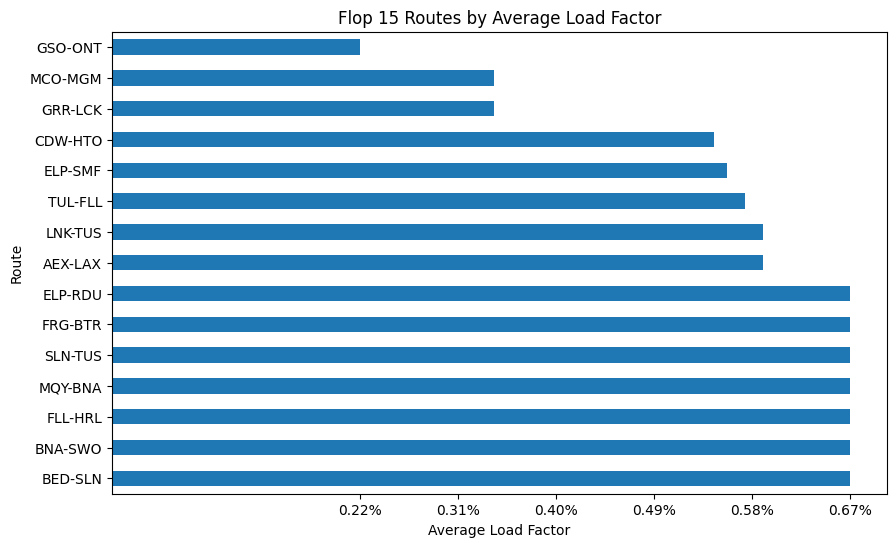

In [61]:
# Plot bar chart for flop 15 routes by average load factor
ax = flop15_route_load_factor["pax_load_factor"].plot(kind="barh", figsize=(10,6))
plt.ylabel("Route")
plt.xlabel("Average Load Factor")
plt.title("Flop 15 Routes by Average Load Factor")
plt.gca().invert_yaxis()
xmin, xmax = flop15_route_load_factor["pax_load_factor"].min(), flop15_route_load_factor["pax_load_factor"].max()
xticks = np.linspace(xmin, xmax, 6)
ax.set_xticks(xticks)
ax.set_xticklabels([f"{x:.2%}" for x in xticks])

plt.show()

**Analyze and visualize the distribution of passenger load factor for domestic vs. international/unknown routes**

<Figure size 1200x600 with 0 Axes>

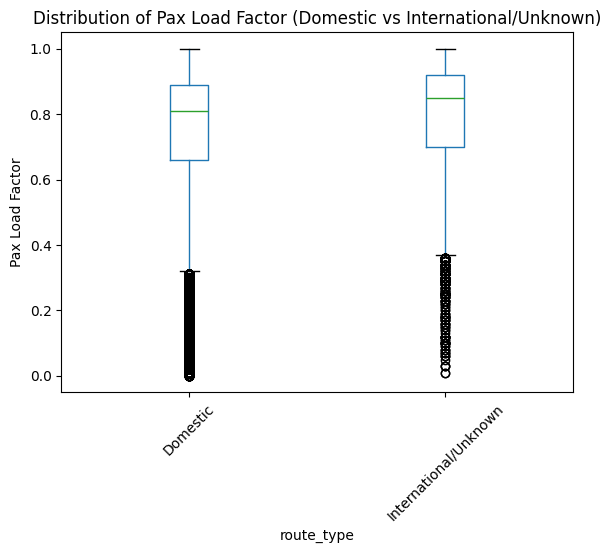

In [62]:
# Plot load factor distribution by route type
plt.figure(figsize=(12,6))
data.boxplot(column="pax_load_factor", by="route_type", rot=45, grid=False)
plt.ylabel("Pax Load Factor")
plt.title("Distribution of Pax Load Factor (Domestic vs International/Unknown)")
plt.suptitle("")
plt.show()

**Count data entries per aircraft type (displaying aircraft type names)**

In [63]:
# Count data entries 
data["aircraft_name"].value_counts()[:20]

aircraft_name
Boeing 737-800                        46607
Airbus Industrie A320-100/200         36795
Boeing B737 Max 800                   29286
Embraer ERJ-175                       27760
Boeing 737-700/700LR/Max 7            24328
Airbus Industrie A319                 21108
Airbus Industrie A321/Lr              18859
Boeing 737-900ER                      15014
Airbus Industrie A321-200n            14611
Airbus Industrie A320-200n            12410
Canadair CRJ 900                      11445
Canadair RJ-700                        8974
Boeing B737 Max 900                    8970
Cessna C206/207/209/210 Stationair     7558
Cessna 208 Caravan                     7191
A220-300 BD-500-1A11                   6400
Pilatus PC-12                          5749
Boeing 757-200                         5664
Embraer-Emb-170                        4714
Cessna C208B/Grand Caravan             4473
Name: count, dtype: int64

**Count entries with seats = 0**

In [64]:
# No seats
count_zero_seats= (data["seats"] == 0).sum()
print("Number of flights with 0 seats:", count_zero_seats)

# No seats share
share_zero_seats = 100 * count_zero_seats / len(data)
print(f"Share: {share_zero_seats:.2f}%")

Number of flights with 0 seats: 0
Share: 0.00%


**Check flights with small number of seats**

In [65]:
# Less than 30 seats (>0)
count_small = ((data["seats"] > 0) & (data["seats"] < 30)).sum()
print("Number of flights with 1–29 seats:", count_small)

# Share of small aircraft with less than 30 seats
share_small = 100 * count_small / len(data)
print(f"Share: {share_small:.2f}%")

Number of flights with 1–29 seats: 24067
Share: 6.59%


**Verify whether entries with a low seat count correspond to small aircraft types**

In [66]:
# Check aircraft types for entries with less than 30 seats
small_aircraft = data[(data["seats"] > 0) & (data["seats"] < 30)]
print(small_aircraft["aircraft_name"].unique())

['Cessna 172 Skyhawk' 'Helio H-250/295/395'
 'Cessna C206/207/209/210 Stationair' 'Cessna 180'
 'Cessna 510 Mustang/560XL Citation Excel' 'Cessna 208 Caravan'
 'Piper PA-31 (Navajo)/T-1020' 'Piper PA-32 (Cherokee 6)'
 'De Havilland DHC2 Beaver' 'Sikorsky S-76'
 'Cessna Citationjet/CJ1/CJ2/CJ3' 'Land-Turbine' 'Pilatus PC-12'
 'Cessna 185A/B/C Skywagon' 'Gipps Aero Ga8 Airvan'
 'Cessna Citation X Model 650/550B/550XL'
 'Raytheon Beechcraft Hawker 400XP' 'Bell 212 Twin Two Twelve'
 'Gulfstream Aerospace Gulfstream G280' 'Cessna Citation X Model CE750 X'
 'Hawker Siddeley 125' 'Cessna CE-680 Citation Sovereign'
 'Raytheon Beechcraft Hawker 900XP' 'Bomardier Challenger 350'
 'Dassault Falcon 2000EX/2000lxs' 'Bombardier BD-100-1A10 Challenger 300'
 'Pilatus Britten-Norman BN2/A Islander' 'Float/Amphib Turbine'
 'Beechcraft Super King Air' 'Agustawestland AW139' 'Gulfstream G200'
 'Airbus Industrie A300-B2' 'P2012 Traveler' 'Embraer Praetor 600'
 'Bombardier Global 7500 BD-7500' 'Gulfstream A

**Check data of bigger aircrafts in list**

There is no comprehensive official aircraft type list available that can be used for mapping minimum seat counts in order to filter outliers. Therefore, this is only a targeted analysis of a few larger aircraft types appearing in the '< 30 seats' category.

In [67]:
# Check some bigger aircrafts in list
suspect_types = [
    "Airbus Industrie A300-B2",
    "Boeing B737 Max 800",
    "Boeing 737-400",
    "Boeing 737-800",
    "Canadair RJ-200ER /RJ-440"
]

# Filter rows with suspect aircraft types
suspect = small_aircraft[
    small_aircraft["aircraft_name"].isin(suspect_types)
][["year","month","origin","dest","departures_performed","aircraft_name","seats","avg_seats_per_flight","passengers","departures_performed", "pax_load_factor"]]

suspect.head(15)

,year,month,origin,dest,departures_performed,aircraft_name,seats,avg_seats_per_flight,passengers,departures_performed,pax_load_factor
2882,2024,2,ORL,DSI,1.0,Airbus Industrie A300-B2,9.0,9,2.0,1.0,0.22
2892,2024,2,TN8,ECP,1.0,Airbus Industrie A300-B2,9.0,9,2.0,1.0,0.22
2893,2024,2,ECP,TN8,1.0,Airbus Industrie A300-B2,9.0,9,2.0,1.0,0.22
2961,2024,2,FXE,ORL,1.0,Airbus Industrie A300-B2,9.0,9,3.0,1.0,0.33
5502,2024,1,TPA,MQY,1.0,Airbus Industrie A300-B2,9.0,9,1.0,1.0,0.11
5503,2024,1,ORF,SUA,1.0,Airbus Industrie A300-B2,9.0,9,1.0,1.0,0.11
5528,2024,1,DSI,TN8,1.0,Airbus Industrie A300-B2,9.0,9,2.0,1.0,0.22
5529,2024,1,MQY,TPA,1.0,Airbus Industrie A300-B2,9.0,9,2.0,1.0,0.22
5543,2024,1,TN8,DSI,1.0,Airbus Industrie A300-B2,9.0,9,3.0,1.0,0.33
5544,2024,1,DSI,FXE,1.0,Airbus Industrie A300-B2,9.0,9,3.0,1.0,0.33


**Map the aircraft configuration and merge the data**

The aircraft configuration codes are matched with their descriptions using the reference mapping file. The following configurations are mapped:
- Aircraft Configuration Not Relevant
- Passenger Configuration
- Freight Configuration
- Combined Passenger and Freight on a main deck
- Seaplane
- Used for capturing expenses not attributed to specific aircraft types

In [68]:
# Read aircraft configuration mapping file
config_mapping = pd.read_csv("../data/config_mapping.csv")

# Strip whitespace from aircraft configuration columns
data["aircraft_config"] = data["aircraft_config"].astype(str).str.strip()
config_mapping["Code"] = config_mapping["Code"].astype(str).str.strip()

# Merge data with configuration mapping
data = data.merge(
    config_mapping, left_on="aircraft_config", right_on="Code", how="left"
)

# New column 'configuration_desc'
data["configuration_desc"] = data["Description"]

# Delete unnecessary columns
data = data.drop(columns=["Code", "Description"])

In [69]:
# Check first rows of data
data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,route_type,aircraft_name,pax_load_factor,configuration_desc
0,0.0,1.0,500.0,2.0,1.0,0.0,0.0,7.0,18.0,10.0,...,2024,6,1,2,1–30,TYE-BVU,Domestic,Cessna 172 Skyhawk,0.5,Passenger Configuration
1,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,2024,7,1,2,1–30,MRI-BVU,Domestic,Cessna 172 Skyhawk,0.5,Passenger Configuration
2,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,2024,4,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.5,Passenger Configuration
3,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,29.0,21.0,...,2024,10,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.5,Passenger Configuration
4,0.0,1.0,500.0,2.0,1.0,0.0,0.0,44.0,33.0,25.0,...,2024,6,1,2,1–30,MRI-TYE,Domestic,Cessna 172 Skyhawk,0.5,Freight Configuration


**Filter only passenger configuration or config not relevant**

Since the analysis focuses on passenger load factors, only flights with passenger or unspecified configurations are kept.

In [70]:
# Filter only relevant configs and rename dataset
pax_config_data = data[data["configuration_desc"].isin([
    "Aircraft Configuration Not Relevant",
    "Passenger Configuration"
])]

**Check again data of bigger aircrafts in list**

In [71]:
# Filter rows with suspect aircraft types in adjusted dataset
small_pax_aircraft = pax_config_data[(pax_config_data["seats"] > 0) & (pax_config_data["seats"] < 30)]
suspect = small_pax_aircraft[
    small_pax_aircraft["aircraft_name"].isin(suspect_types)
][["year","month","origin","dest","departures_performed","aircraft_name","configuration_desc","seats","avg_seats_per_flight","passengers","departures_performed"]]

# Sample
suspect.sample(5)

,year,month,origin,dest,departures_performed,aircraft_name,configuration_desc,seats,avg_seats_per_flight,passengers,departures_performed
5492,2024,1,TPA,MQY,1.0,Airbus Industrie A300-B2,Passenger Configuration,9.0,9,1.0,1.0
6807,2024,12,VNY,MRY,1.0,Canadair RJ-200ER /RJ-440,Passenger Configuration,15.0,15,1.0,1.0
2888,2024,2,TN8,ECP,1.0,Airbus Industrie A300-B2,Passenger Configuration,9.0,9,2.0,1.0
7509,2024,4,SWF,OPF,1.0,Boeing B737 Max 800,Passenger Configuration,17.0,17,9.0,1.0
7512,2024,6,VNY,FOK,1.0,Boeing B737 Max 800,Passenger Configuration,17.0,17,11.0,1.0


In [72]:
# Check again aircraft types for entries with less than 30 seats in adjusted dataset
print(small_pax_aircraft["aircraft_name"].unique())

['Cessna 172 Skyhawk' 'Helio H-250/295/395' 'Cessna 180'
 'Cessna C206/207/209/210 Stationair'
 'Cessna 510 Mustang/560XL Citation Excel' 'Cessna 208 Caravan'
 'Piper PA-31 (Navajo)/T-1020' 'Piper PA-32 (Cherokee 6)' 'Sikorsky S-76'
 'Cessna Citationjet/CJ1/CJ2/CJ3' 'Land-Turbine' 'Pilatus PC-12'
 'Gipps Aero Ga8 Airvan' 'Cessna Citation X Model 650/550B/550XL'
 'Raytheon Beechcraft Hawker 400XP' 'De Havilland DHC2 Beaver'
 'Gulfstream Aerospace Gulfstream G280' 'Cessna Citation X Model CE750 X'
 'Hawker Siddeley 125' 'Cessna CE-680 Citation Sovereign'
 'Raytheon Beechcraft Hawker 900XP' 'Bomardier Challenger 350'
 'Dassault Falcon 2000EX/2000lxs' 'Bombardier BD-100-1A10 Challenger 300'
 'Pilatus Britten-Norman BN2/A Islander' 'Float/Amphib Turbine'
 'Beechcraft Super King Air' 'Agustawestland AW139' 'Gulfstream G200'
 'Airbus Industrie A300-B2' 'P2012 Traveler' 'Embraer Praetor 600'
 'Bombardier Global 7500 BD-7500' 'Gulfstream Aerospace G500'
 'De Havilland DHC3 Otter' 'Beech 200 Sup

In [73]:
# Check some bigger aircrafts in the new list
suspects = [
    "Airbus Industrie A300-B2",
    "Boeing B737 Max 800",
    "Embraer-135",
    "Canadair RJ-200ER /RJ-440"
]

# Rows with < 30 seats
suspect_rows = pax_config_data[
    (pax_config_data["seats"] < 30) & 
    (pax_config_data["aircraft_name"].isin(suspects))
][["year", "month", "origin", "dest", "aircraft_name", "seats", "unique_carrier_name","passengers", "departures_performed", "pax_load_factor"]]

suspect_rows.head(20)

,year,month,origin,dest,aircraft_name,seats,unique_carrier_name,passengers,departures_performed,pax_load_factor
2878,2024,2,ORL,DSI,Airbus Industrie A300-B2,9.0,CFM Inc d/b/a Contour Airlines d/b/a One Jet S...,2.0,1.0,0.22
2888,2024,2,TN8,ECP,Airbus Industrie A300-B2,9.0,CFM Inc d/b/a Contour Airlines d/b/a One Jet S...,2.0,1.0,0.22
2889,2024,2,ECP,TN8,Airbus Industrie A300-B2,9.0,CFM Inc d/b/a Contour Airlines d/b/a One Jet S...,2.0,1.0,0.22
2957,2024,2,FXE,ORL,Airbus Industrie A300-B2,9.0,CFM Inc d/b/a Contour Airlines d/b/a One Jet S...,3.0,1.0,0.33
5492,2024,1,TPA,MQY,Airbus Industrie A300-B2,9.0,CFM Inc d/b/a Contour Airlines d/b/a One Jet S...,1.0,1.0,0.11
5493,2024,1,ORF,SUA,Airbus Industrie A300-B2,9.0,CFM Inc d/b/a Contour Airlines d/b/a One Jet S...,1.0,1.0,0.11
5518,2024,1,DSI,TN8,Airbus Industrie A300-B2,9.0,CFM Inc d/b/a Contour Airlines d/b/a One Jet S...,2.0,1.0,0.22
5519,2024,1,MQY,TPA,Airbus Industrie A300-B2,9.0,CFM Inc d/b/a Contour Airlines d/b/a One Jet S...,2.0,1.0,0.22
5533,2024,1,TN8,DSI,Airbus Industrie A300-B2,9.0,CFM Inc d/b/a Contour Airlines d/b/a One Jet S...,3.0,1.0,0.33
5534,2024,1,DSI,FXE,Airbus Industrie A300-B2,9.0,CFM Inc d/b/a Contour Airlines d/b/a One Jet S...,3.0,1.0,0.33


In [74]:
# Share of rows classified as suspect 
share = 100 * len(suspect_rows) / len(pax_config_data)

print(f"Share: {share:.4f}%")

Share: 0.0289%


**Check mean of average seats per flight per aircraft type and merge with dataset**

In [75]:
# Check mean of average seats per flight by grouping by aircraft type
mean_seats_per_aircraft = (
    pax_config_data
    .groupby("aircraft_name")["avg_seats_per_flight"]
    .mean()
    .reset_index()
    .sort_values("avg_seats_per_flight", ascending=False)
)

print(mean_seats_per_aircraft.head(15))


                    aircraft_name  avg_seats_per_flight
40     Boeing 777-300/300ER/333ER            331.763889
39   Boeing 777-200ER/200LR/233LR            322.583779
41       Boeing 787-10 Dreamliner                 318.0
15      Airbus Industrie A350-900            313.805714
13  Airbus Industrie A330-300/333            281.914397
14      Airbus Industrie A330-900            280.877193
17            B787-900 Dreamliner             269.99095
12      Airbus Industrie A330-200            268.454373
33                 Boeing 747-400                 252.5
16            B787-800 Dreamliner            236.776224
35                 Boeing 757-300                 234.0
38              Boeing 767-400/ER            233.735602
36           Boeing 767-200/ER/EM             215.27907
10     Airbus Industrie A321-200n            214.678872
37           Boeing 767-300/300ER            210.433071


In [76]:
# Merge with dataset
pax_config_data = pax_config_data.merge(
    mean_seats_per_aircraft.rename(columns={"avg_seats_per_flight": "mean_avg_seats_per_type"}),
    on="aircraft_name",
    how="left"
)
pax_config_data.head(15)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,route_type,aircraft_name,pax_load_factor,configuration_desc,mean_avg_seats_per_type
0,0.0,1.0,500.0,2.0,1.0,0.0,0.0,7.0,18.0,10.0,...,6,1,2,1–30,TYE-BVU,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.968056
1,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,7,1,2,1–30,MRI-BVU,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.968056
2,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,4,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.968056
3,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,29.0,21.0,...,10,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.968056
4,0.0,1.0,500.0,2.0,1.0,50.0,0.0,40.0,28.0,20.0,...,6,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.968056
5,0.0,1.0,500.0,2.0,1.0,50.0,0.0,44.0,33.0,25.0,...,6,1,2,1–30,TYE-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.968056
6,0.0,1.0,500.0,2.0,1.0,80.0,0.0,44.0,33.0,25.0,...,12,1,2,1–30,TYE-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.968056
7,0.0,1.0,500.0,2.0,1.0,90.0,0.0,40.0,29.0,21.0,...,10,1,2,1–30,MRI-BVU,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.968056
8,0.0,1.0,600.0,3.0,1.0,0.0,0.0,181.0,90.0,88.0,...,8,1,3,1–30,CXF-FAI,Domestic,Helio H-250/295/395,0.33,Passenger Configuration,2.916667
9,0.0,1.0,600.0,3.0,2.0,0.0,0.0,25.0,15.0,13.0,...,7,2,3,1–30,BTT-PPC,Domestic,Helio H-250/295/395,0.67,Passenger Configuration,2.916667


**Round mean_avg_seats_per_type values**

In [77]:
pax_config_data["mean_avg_seats_per_type"] = pax_config_data["mean_avg_seats_per_type"].round(2)
pax_config_data.head(15)

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,route_type,aircraft_name,pax_load_factor,configuration_desc,mean_avg_seats_per_type
0,0.0,1.0,500.0,2.0,1.0,0.0,0.0,7.0,18.0,10.0,...,6,1,2,1–30,TYE-BVU,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
1,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,7,1,2,1–30,MRI-BVU,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
2,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,4,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
3,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,29.0,21.0,...,10,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
4,0.0,1.0,500.0,2.0,1.0,50.0,0.0,40.0,28.0,20.0,...,6,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
5,0.0,1.0,500.0,2.0,1.0,50.0,0.0,44.0,33.0,25.0,...,6,1,2,1–30,TYE-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
6,0.0,1.0,500.0,2.0,1.0,80.0,0.0,44.0,33.0,25.0,...,12,1,2,1–30,TYE-MRI,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
7,0.0,1.0,500.0,2.0,1.0,90.0,0.0,40.0,29.0,21.0,...,10,1,2,1–30,MRI-BVU,Domestic,Cessna 172 Skyhawk,0.50,Passenger Configuration,2.97
8,0.0,1.0,600.0,3.0,1.0,0.0,0.0,181.0,90.0,88.0,...,8,1,3,1–30,CXF-FAI,Domestic,Helio H-250/295/395,0.33,Passenger Configuration,2.92
9,0.0,1.0,600.0,3.0,2.0,0.0,0.0,25.0,15.0,13.0,...,7,2,3,1–30,BTT-PPC,Domestic,Helio H-250/295/395,0.67,Passenger Configuration,2.92


**Analyze and visualize the distribution of average seats per flight – Top 20 aircraft types (by mean)**

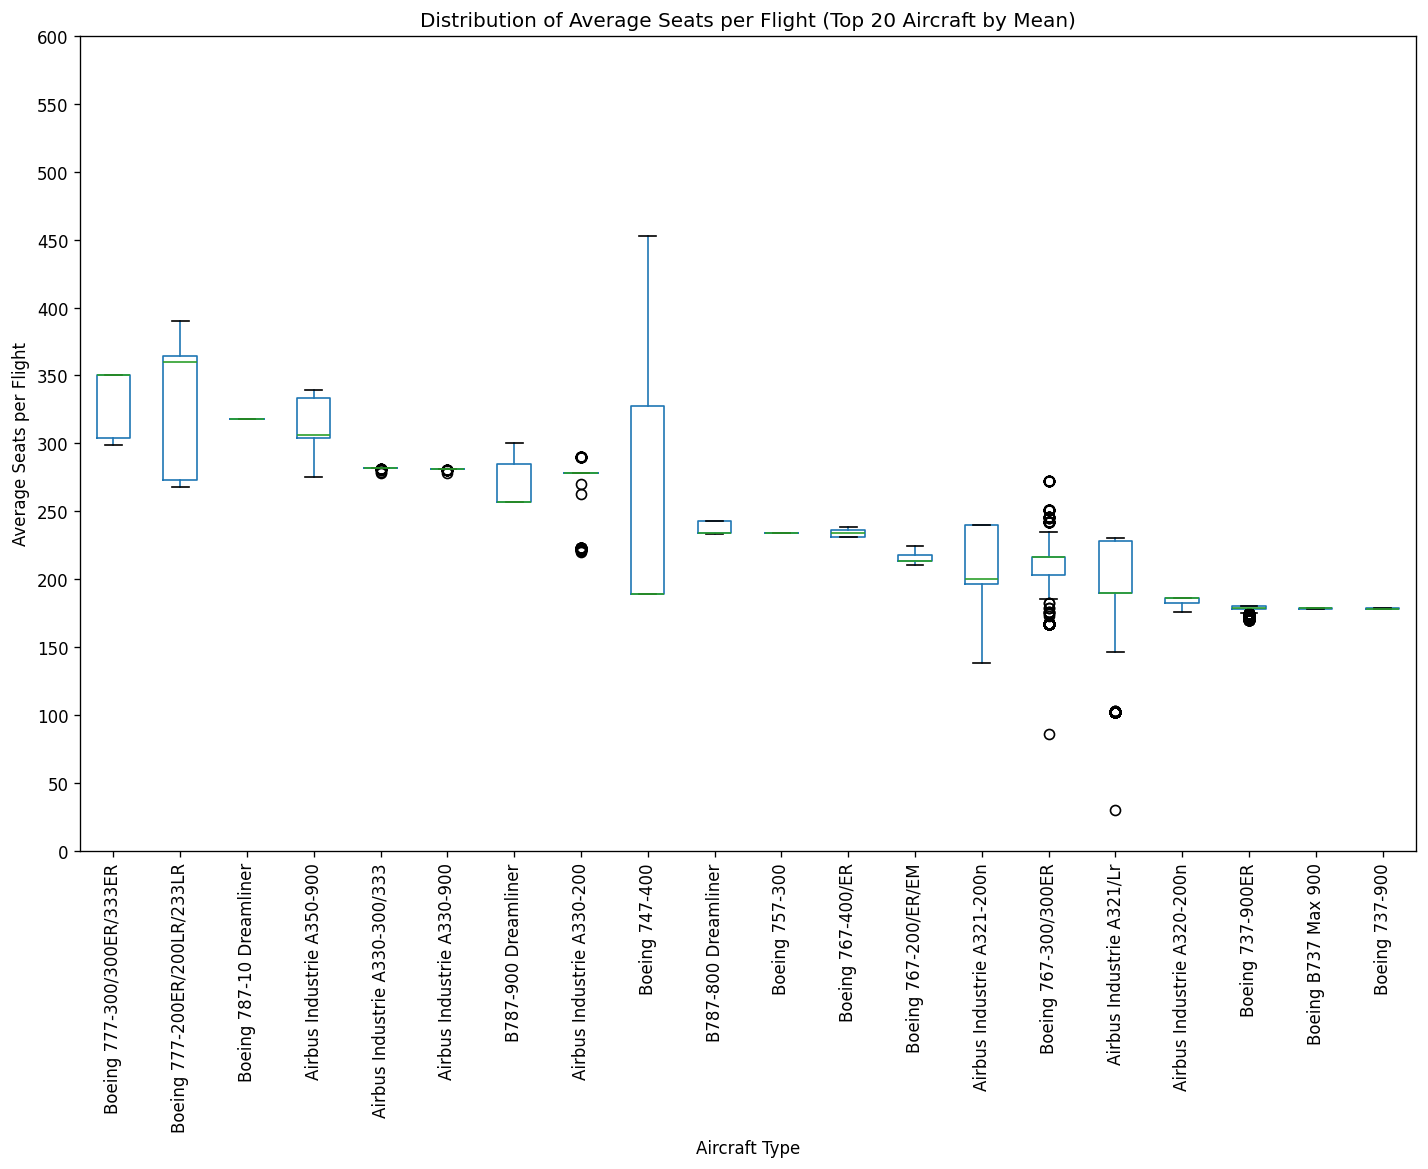

In [78]:
# Top 20 aircraft by mean
top20_names = (
    mean_seats_per_aircraft
    .nlargest(20, "avg_seats_per_flight")
    ["aircraft_name"]
    .tolist()
)

# Subset
subset = pax_config_data[pax_config_data["aircraft_name"].isin(top20_names)].copy()

# Order & remove NaNs
subset["aircraft_name"] = pd.Categorical(subset["aircraft_name"], categories=top20_names, ordered=True)
subset = subset[subset["avg_seats_per_flight"].notna()]

# Create boxplot
fig, ax = plt.subplots(figsize = (12, 10), dpi=120)
ax = subset.boxplot(column="avg_seats_per_flight", by="aircraft_name", rot=90, grid=False, ax=ax)
ax.set_ylabel("Average Seats per Flight")
ax.set_title("Distribution of Average Seats per Flight (Top 20 Aircraft by Mean)")
ax.set_xlabel("Aircraft Type")
ax.figure.suptitle("")

ax.set_ylim(0, 600)
ax.set_yticks(np.arange(0, 601, 50))

plt.tight_layout()
plt.show()


**Further data cleaning: Filter implausible seat counts**

Each aircraft type is checked for outliers by comparing the average seats per flight to the type-specific mean.

In [79]:
# Flag whether value is within [50 %, 150 %] of the type mean
pax_config_data["within_range"] = (
    (pax_config_data["avg_seats_per_flight"] >= 0.5 * pax_config_data["mean_avg_seats_per_type"]) &
    (pax_config_data["avg_seats_per_flight"] <= 1.5 * pax_config_data["mean_avg_seats_per_type"])
)

# Count per aircraft how many rows would be removed
outlier_stats = (
    pax_config_data.groupby("aircraft_name")
    .agg(
        total=("avg_seats_per_flight", "size"),
        removed=("within_range", lambda x: (~x).sum())
    )
)

# Calculate share of rows to be removed in %
outlier_stats["removed_share_%"] = (100 * outlier_stats["removed"] / outlier_stats["total"]).round(2)

print(outlier_stats.sort_values("removed_share_%", ascending=False).head(20))

                                       total  removed  removed_share_%
aircraft_name                                                         
Bombardier Challenger 604/605            767      153            19.95
Boeing 747-400                            42        8            19.05
Sikorsky S-76                             41        6            14.63
Pilatus Britten-Norman BN2/A Islander    162       20            12.35
Fairchild Metro 23                       108       12            11.11
Bombardier Global 7500 BD-7500            33        3             9.09
Embraer-135                             1303       72             5.53
Cessna C206/207/209/210 Stationair      6986      259             3.71
Piper PA-31 (Navajo)/T-1020             3588       59             1.64
Cessna 208 Caravan                      6096       49              0.8
Cessna C208B/Grand Caravan              4148       29              0.7
Airbus Industrie A319                  21108       92             0.44
Canada

The target variable here is the passenger load factor, which makes the absolute seat count less relevant. However, implausible values in either seats or passengers can still distort the load factor. To mitigate this risk, different thresholds are applied for large and small aircraft types: stricter bounds (50–150 %) for larger aircraft and wider bounds (25–150 %) for smaller aircraft. Entries outside these ranges of the type-specific mean are treated as implausible outliers and removed.

In [80]:
# Create a copy of the dataframe to work with
df = pax_config_data.copy()

# Threshold of 100 mean average seats for larger aircrafts
df["is_large_aircraft"] = df["mean_avg_seats_per_type"] >= 100

# Define outlier thresholds
lower_large, upper_large = 0.50, 1.50   # 50 – 150 % for larger aircrafts
lower_small, upper_small = 0.25, 1.50   # 25 – 150 % for smaller aircrafts

# Apply rule
lower = np.where(df["is_large_aircraft"], lower_large, lower_small)
upper = np.where(df["is_large_aircraft"], upper_large, upper_small)

df["within_range"] = (
    (df["avg_seats_per_flight"] >= lower * df["mean_avg_seats_per_type"]) &
    (df["avg_seats_per_flight"] <= upper * df["mean_avg_seats_per_type"])
)

# Check how many entries are removed
stats_overall = pd.DataFrame({
    "total": [len(df)],
    "removed": [(~df["within_range"]).sum()],
})
stats_overall["removed_share_%"] = (100 * stats_overall["removed"] / stats_overall["total"]).round(2)

stats_by_type = (
    df.groupby("aircraft_name")
      .agg(total=("avg_seats_per_flight", "size"),
           removed=("within_range", lambda x: (~x).sum()))
)
stats_by_type["removed_share_%"] = (100 * stats_by_type["removed"] / stats_by_type["total"]).round(2)
stats_by_type = stats_by_type.sort_values("removed_share_%", ascending=False)

print("Total:")
print(stats_overall, "\n")
print("Top 20 types by removed share:")
print(stats_by_type.head(20))

# Give out new dataset
clean_data = df[df["within_range"]].drop(columns=["mean_avg_seats_per_type","is_large_aircraft","within_range"]).copy()


Total:
    total  removed  removed_share_%
0  360129      710              0.2 

Top 20 types by removed share:
                                       total  removed  removed_share_%
aircraft_name                                                         
Bombardier Challenger 604/605            767      153            19.95
Boeing 747-400                            42        8            19.05
Sikorsky S-76                             41        6            14.63
Pilatus Britten-Norman BN2/A Islander    162       20            12.35
Fairchild Metro 23                       108       12            11.11
Bombardier Global 7500 BD-7500            33        3             9.09
Cessna C206/207/209/210 Stationair      6986       95             1.36
Cessna C208B/Grand Caravan              4148       29              0.7
Airbus Industrie A319                  21108       92             0.44
Boeing 737-800                         46578      165             0.35
Beech 200 Super Kingair             

**Check dataframe again**

In [81]:
# Final check of the cleaned dataset
clean_data.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,year,month,avg_passengers_per_flight,avg_seats_per_flight,avg_passengers_binned,route,route_type,aircraft_name,pax_load_factor,configuration_desc
0,0.0,1.0,500.0,2.0,1.0,0.0,0.0,7.0,18.0,10.0,...,2024,6,1,2,1–30,TYE-BVU,Domestic,Cessna 172 Skyhawk,0.5,Passenger Configuration
1,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,2024,7,1,2,1–30,MRI-BVU,Domestic,Cessna 172 Skyhawk,0.5,Passenger Configuration
2,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,28.0,20.0,...,2024,4,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.5,Passenger Configuration
3,0.0,1.0,500.0,2.0,1.0,0.0,0.0,40.0,29.0,21.0,...,2024,10,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.5,Passenger Configuration
4,0.0,1.0,500.0,2.0,1.0,50.0,0.0,40.0,28.0,20.0,...,2024,6,1,2,1–30,BVU-MRI,Domestic,Cessna 172 Skyhawk,0.5,Passenger Configuration


In [82]:
# Final info of the cleaned dataset
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359419 entries, 0 to 360128
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   departures_scheduled       359419 non-null  float64 
 1   departures_performed       359419 non-null  float64 
 2   payload                    359419 non-null  float64 
 3   seats                      359419 non-null  float64 
 4   passengers                 359419 non-null  float64 
 5   freight                    359419 non-null  float64 
 6   mail                       359419 non-null  float64 
 7   distance                   359419 non-null  float64 
 8   ramp_to_ramp               359419 non-null  float64 
 9   air_time                   359419 non-null  float64 
 10  unique_carrier             359419 non-null  object  
 11  unique_carrier_name        359419 non-null  object  
 12  carrier_group              359419 non-null  int64   
 13  origin_airport_id  

**Feature selection: Remove non-explanatory or leaking variables**

This step removes identifiers, descriptive fields and aggregated statistics to prevent data leakage and reduce redundancy in the feature matrix.

In [83]:
# Drop IDs, names and redundant information (carrier, airport, aircraft name, config description, airport IDs) 
# Drop year and month to avoid introducing time-series effects
# Drop averages, mean and bins, passenger and seat numbers (avg. passengers per flight, avg. seats per flight, passenger bins etc.) because they would cause data leakage

drop_cols = [
    "departures_scheduled", "unique_carrier", "unique_carrier_name",
    "origin", "origin_city_name", "dest", "dest_city_name",
    "origin_airport_id", "dest_airport_id", "origin_state_fips", "dest_state_fips",  
    "year", "month",
    "avg_passengers_per_flight", "avg_seats_per_flight", "avg_passengers_binned",
    "aircraft_name", "configuration_desc", "seats", "passengers"
]

clean_data = clean_data.drop(columns=drop_cols)
clean_data.head()

,departures_performed,payload,freight,mail,distance,ramp_to_ramp,air_time,carrier_group,aircraft_type,aircraft_config,route,route_type,pax_load_factor
0,1.0,500.0,0.0,0.0,7.0,18.0,10.0,1,36,1,TYE-BVU,Domestic,0.5
1,1.0,500.0,0.0,0.0,40.0,28.0,20.0,1,36,1,MRI-BVU,Domestic,0.5
2,1.0,500.0,0.0,0.0,40.0,28.0,20.0,1,36,1,BVU-MRI,Domestic,0.5
3,1.0,500.0,0.0,0.0,40.0,29.0,21.0,1,36,1,BVU-MRI,Domestic,0.5
4,1.0,500.0,50.0,0.0,40.0,28.0,20.0,1,36,1,BVU-MRI,Domestic,0.5


**Correlation matrix of numerical features (Pearson Coefficients)**

The matrix is used to identify linear relationships between numerical features and helps to detect multicollinearity, redundant variables and potential data leakage before modeling.

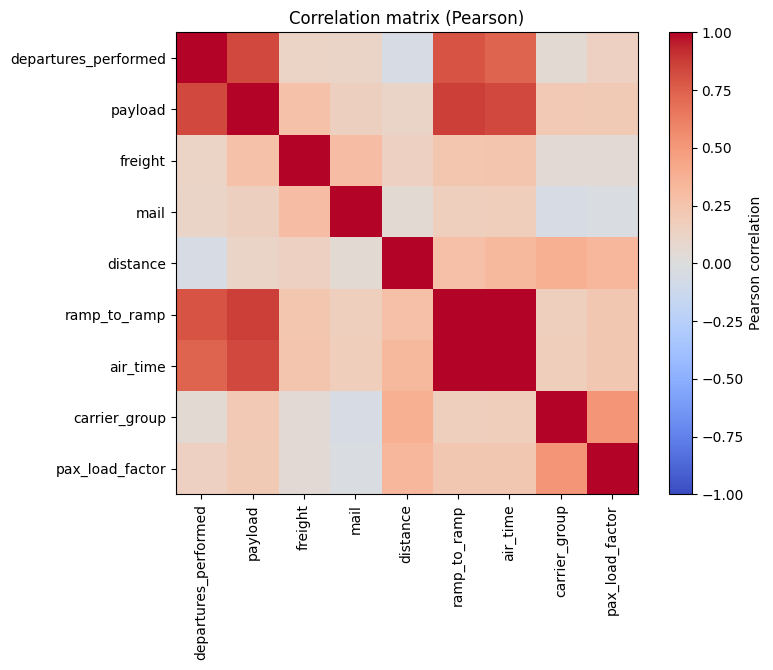

In [84]:
pearson = clean_data.select_dtypes('number').corr(method='pearson')
plt.figure(figsize=(8,6))
plt.imshow(pearson, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Pearson correlation")
plt.xticks(range(len(pearson.columns)), pearson.columns, rotation=90)
plt.yticks(range(len(pearson.index)), pearson.index)
plt.title("Correlation matrix (Pearson)")
plt.show()



**Analyze top 10 strongest feature correlations (Pearson)**

In [85]:
# Top 10 Correlations
mask = ~np.eye(len(pearson), dtype=bool)
pearson_long = (
    pearson.where(mask)
           .stack()
           .reset_index()
)
pearson_long.columns = ["var1", "var2", "corr"]
top10 = (
    pearson_long
    .assign(abs_corr=lambda d: d["corr"].abs())
    .sort_values("abs_corr", ascending=False)
    .drop_duplicates(subset=["abs_corr"]) 
    .head(10)
)

print(top10)

                    var1             var2      corr  abs_corr
53              air_time     ramp_to_ramp  0.992672  0.992672
41          ramp_to_ramp          payload  0.866140  0.866140
0   departures_performed          payload  0.834497  0.834497
13               payload         air_time  0.831547  0.831547
4   departures_performed     ramp_to_ramp  0.789893  0.789893
5   departures_performed         air_time  0.727198  0.727198
63         carrier_group  pax_load_factor  0.520755  0.520755
38              distance    carrier_group  0.382439  0.382439
39              distance  pax_load_factor  0.330214  0.330214
52              air_time         distance  0.325187  0.325187


**Drop ramp to ramp column**

Correlation analysis revealed strong relationship between ramp_to_ramp and air_time, since block time (ramp_to_ramp) already includes airborne time (air_time). To avoid redundancy and multicollinearity, ramp_to_ramp is removed while keeping air_time.

In [86]:
# Drop 'ramp_to_ramp' to avoid redundancy with 'air_time'
clean_data = clean_data.drop(columns=["ramp_to_ramp"])

##### **Further analysis with cleaned dataset**

Pairplot: Exploring relationships between key numerical features

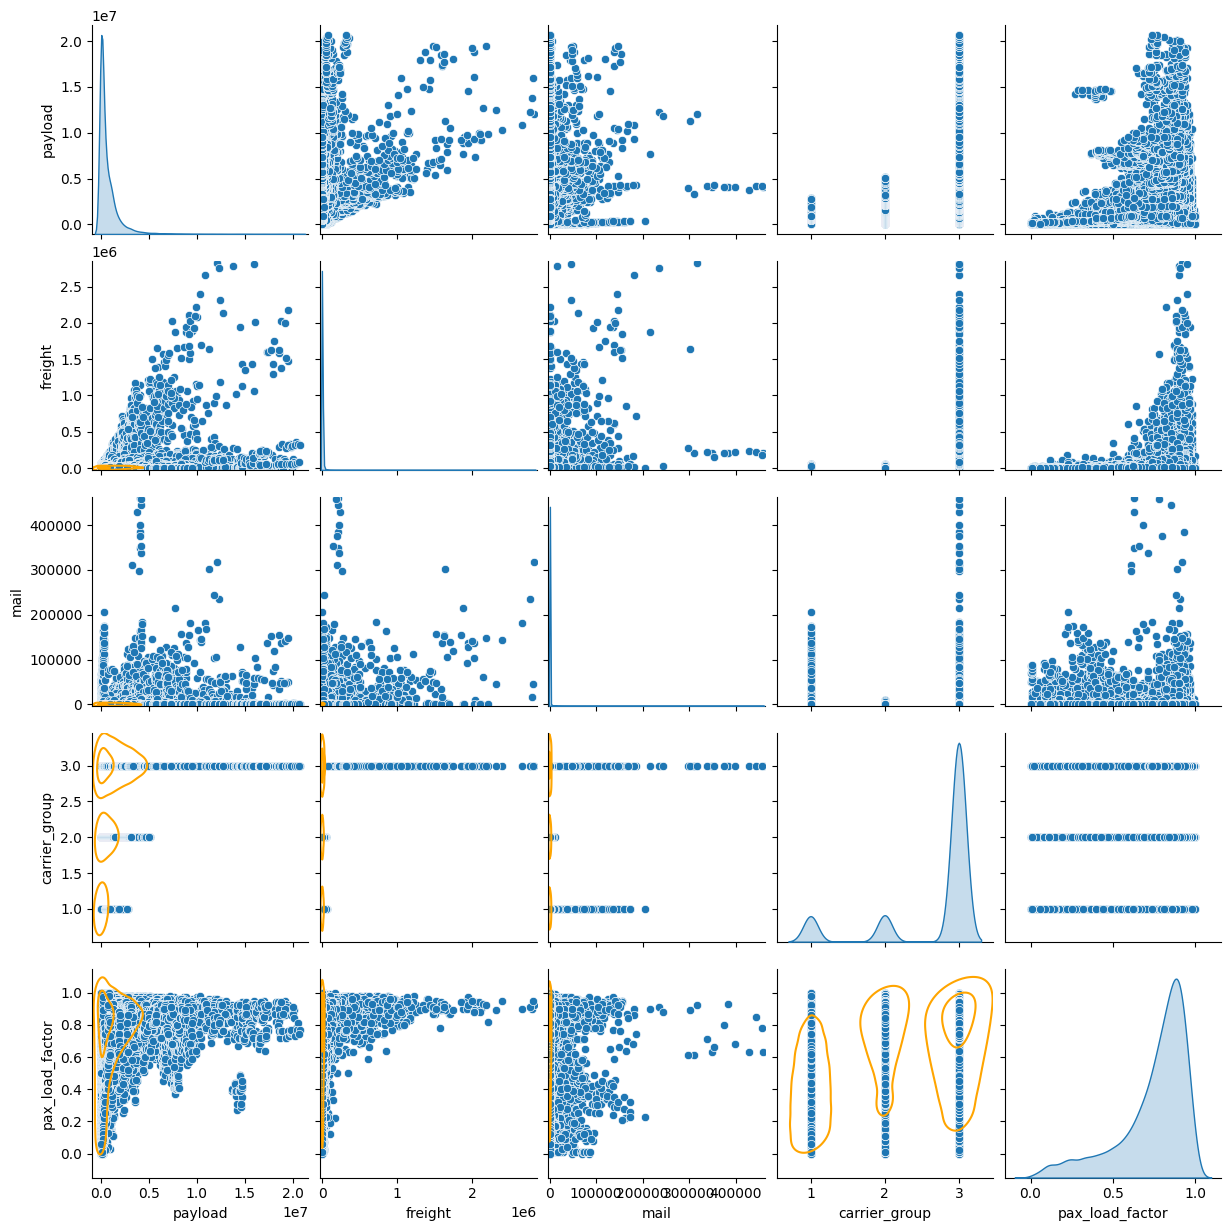

In [87]:
g = sns.pairplot(
    clean_data.drop(labels=["departures_performed", "distance", "air_time"], axis=1),
    diag_kind="kde",
    diag_kws={"bw_adjust": 2},
)
g.map_lower(sns.kdeplot, levels=3, color="orange", bw_adjust=2)

**Distribution analysis by aircraft type (Kernel Density Estimation)**

This plot visualizes the passenger load factor distributions for the 15 most frequent aircraft types. Each density curve represents one aircraft model, highlighting variations in average occupancy patterns.

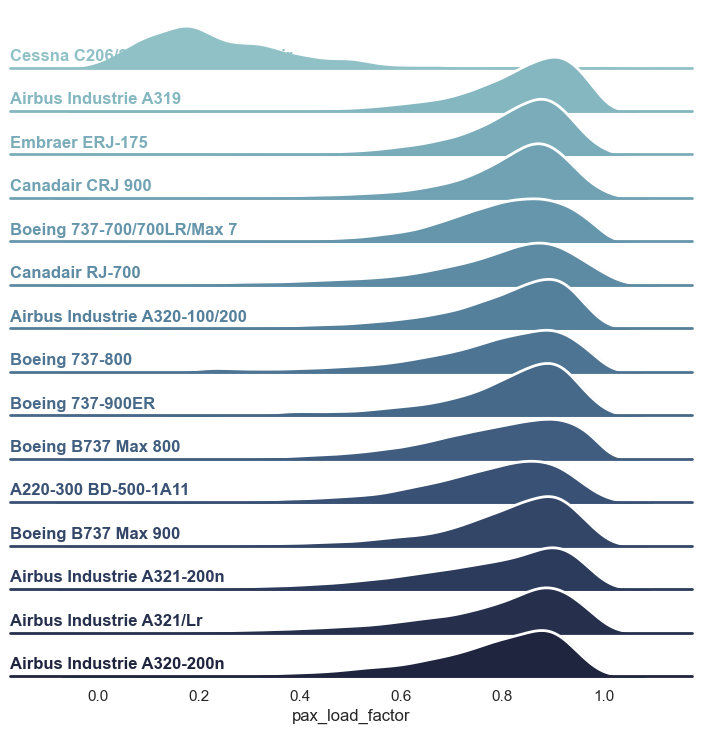

In [93]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Map aircraft_type and aircraft_name again
type_to_name = data[["aircraft_type", "aircraft_name"]].drop_duplicates()

# Merge for plotting
plot_data = clean_data.merge(type_to_name, on="aircraft_type", how="left")

# Initialize the FacetGrid object
aircraft = plot_data["aircraft_name"].value_counts().head(15).index
pal = sns.cubehelix_palette(len(aircraft), rot=-0.25, light=0.7)
g = sns.FacetGrid(plot_data[plot_data["aircraft_name"].isin(aircraft)], row="aircraft_name", hue="aircraft_name", aspect=15, height=0.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "pax_load_factor", bw_adjust=1.2, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "pax_load_factor", clip_on=False, color="w", lw=2, bw_adjust=1.2)


# Passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0,
        0.2,
        label,
        fontweight="bold",
        color=color,
        ha="left",
        va="center",
        transform=ax.transAxes,
    )


g.map(label, "pax_load_factor")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.25)

# Remove axes details
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.show()

# Suppress specific warning from matplotlib about tight_layout
warnings.filterwarnings(
    "ignore",
    message="(?i).*tight layout.*axes height.*",
    category=UserWarning
)


**Distribution analysis by route (Kernel Density Estimation)**

This plot visualizes the passenger load factor distributions for the 15 most frequent routes. Each density curve represents one route, highlighting variations in average occupancy patterns.

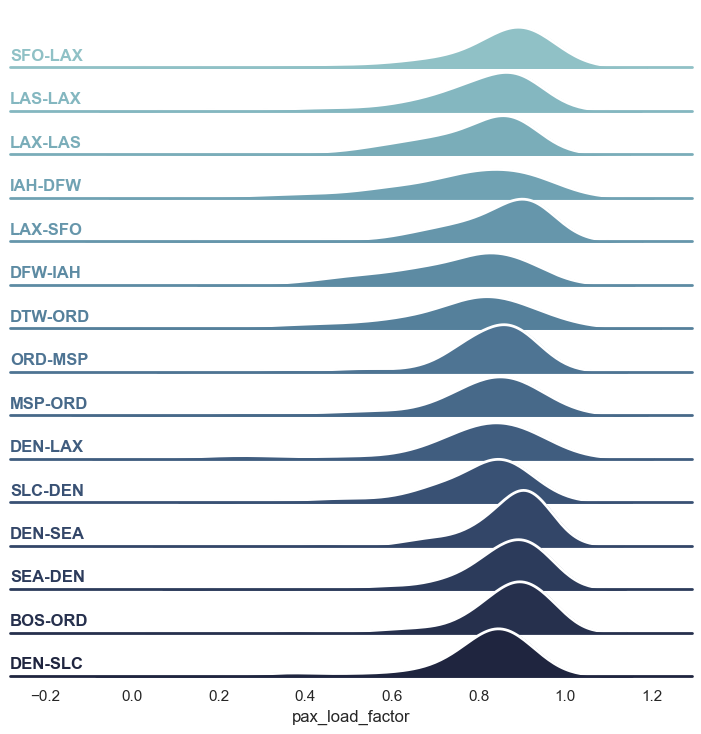

In [89]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
route = clean_data["route"].value_counts().head(15).index
pal = sns.cubehelix_palette(len(route), rot=-0.25, light=0.7)
g = sns.FacetGrid(plot_data[plot_data["route"].isin(route)], row="route", hue="route", aspect=15, height=0.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "pax_load_factor", bw_adjust=1.2, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "pax_load_factor", clip_on=False, color="w", lw=2, bw_adjust=1.2)


# Passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0,
        0.2,
        label,
        fontweight="bold",
        color=color,
        ha="left",
        va="center",
        transform=ax.transAxes,
    )


g.map(label, "pax_load_factor")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.25)

# Remove axes details
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.show()

warnings.filterwarnings(
    "ignore",
    message=".*tight_layout.*Axes height small enough.*",
    category=UserWarning
)

**Distribution of aircraft types (Long-Tail Analysis)**

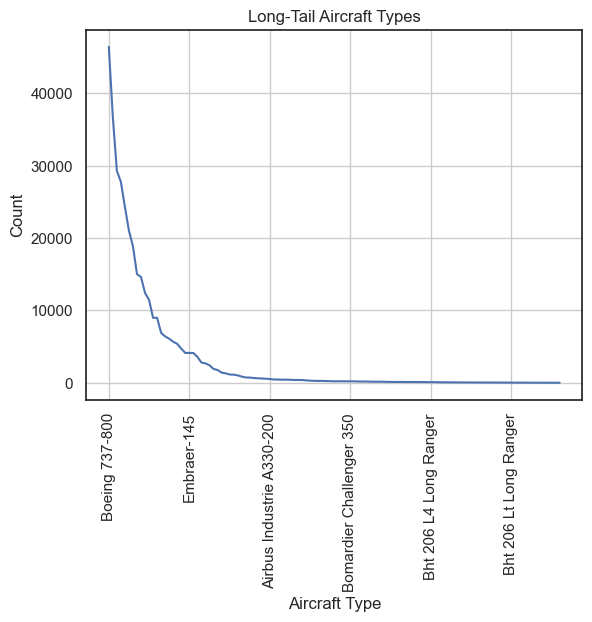

In [90]:
# Plot long-tail of aircraft types
ax = plot_data["aircraft_name"].value_counts().plot(kind='line', title="Long-Tail Aircraft Types", xlabel="Aircraft Type", ylabel="Count")
ax.grid(True)
plt.xticks(rotation=90)
plt.show()

**Distribution of routes (Long-Tail Analysis) - Top 30 routes**

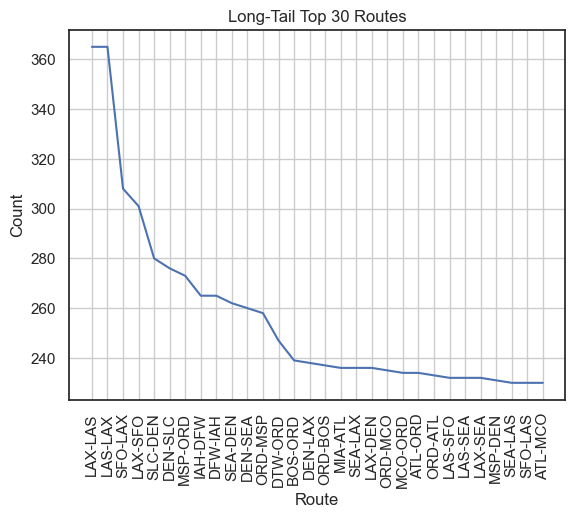

In [91]:
# Plot long-tail of top 30 routes
top_routes = clean_data["route"].value_counts().head(30)
ax = top_routes.plot(kind="line", title="Long-Tail Top 30 Routes", xlabel="Route", ylabel="Count")
ax.grid(True)
plt.xticks(ticks=range(len(top_routes)), labels=top_routes.index, rotation=90)
plt.show()

**The cleaned dataset is exported for further preprocessing**

The cleaned and preprocessed dataset is exported as a CSV file to serve as the input for the second notebook, where the passenger load factor prediction models are developed and evaluated.

In [92]:
# Export clean dataset
output_path = "../data/passenger_load_data.csv"
clean_data.to_csv(output_path, index=False)

print(f"Clean dataset exported successfully: {output_path}")

Clean dataset exported successfully: ../data/passenger_load_data.csv
